## Practical Task No.1 - 2022.09.28

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [164]:
volunteersDictionary = {}
columnsList = [
    "Record Time (Records each 0.5s)",
    "Date (Experiment Date)",
    "Signal level (0 (perfect) -200 (no signal))",
    "Attention (0-100% (maximum attention))",
    "Meditation (0-100% (maximum meditation))",
    "Delta (1-3Hz)",
    "Theta (4-7Hz)",
    "Low Alpha (8-9Hz)",
    "High Alfa (10-12Hz)",
    "Low Beta (13-17Hz)",
    "High Beta (18-30Hz)",
    "Low Gama (31-40Hz)",
    "High Gama (41-50Hz)",
    "RAW EEG (Voltage)",
    "Blink Strength (0-255 (maximum))",
    "Counter (not used)",
    "Average Attention (0-100% (maximum attention))",
    "Counter (not used)",
]
signalsList = [
    "Attention (0-100% (maximum attention))",
    "Meditation (0-100% (maximum meditation))",
    "Delta (1-3Hz)",
    "Theta (4-7Hz)",
    "Low Alpha (8-9Hz)",
    "High Alfa (10-12Hz)",
    "Low Beta (13-17Hz)",
    "High Beta (18-30Hz)",
    "Low Gama (31-40Hz)",
    "High Gama (41-50Hz)",
    "RAW EEG (Voltage)",
    "Blink Strength (0-255 (maximum))"
]
volunteerIndexesList = []


In [165]:
count = 1
while (count < 11):
    key = f'Volunteer {str(count)}'
    volunteerIndexesList.append(key)
    path = "./ExperimentData/volunteer"
    if count < 10:
        specifier = "0" + str(count) + ".txt"
    elif count == 10:
        specifier = str(count) + ".txt"

    value = pd.read_csv(path + specifier, sep=";")
    value.columns = columnsList
    value.drop("Counter (not used)", axis=1)
    volunteersDictionary[key] = value

    count += 1


In [166]:
def generateSignalStatisticalMeasuresTable(signal):
    volunteersSignalMean = []
    volunteersSignalMax = []
    volunteersSignalStandardDeviation = []

    for volunteer in volunteersDictionary.values():
        volunteersSignalMean.append(volunteer[signal].mean())
        volunteersSignalMax.append(volunteer[signal].max())
        volunteersSignalStandardDeviation.append(
            volunteer[signal].std())

    dataFrame = {}
    meanKey = str(signal) + ' Mean'
    dataFrame[meanKey] = volunteersSignalMean
    maxKey = str(signal) + ' Max'
    dataFrame[maxKey] = volunteersSignalMax
    stdKey = str(signal) + ' Standard Deviation'
    dataFrame[stdKey] = volunteersSignalStandardDeviation

    return pd.DataFrame(dataFrame, index=volunteerIndexesList)


In [167]:
signalTablesList = []

for signal in signalsList:
    signalTablesList.append(generateSignalStatisticalMeasuresTable(signal))


In [168]:
concatenatedSignalsListTable = pd.concat(
    signalTablesList, axis="columns", join="inner"
)
concatenatedSignalsListTable


Attention (0-100% (maximum attention)) Mean  \
Volunteer 1                                     43.233607   
Volunteer 2                                     40.028807   
Volunteer 3                                     56.329218   
Volunteer 4                                     59.807377   
Volunteer 5                                     43.192623   
Volunteer 6                                     45.336066   
Volunteer 7                                     45.881148   
Volunteer 8                                     41.176230   
Volunteer 9                                     46.893443   
Volunteer 10                                    49.077869   

              Attention (0-100% (maximum attention)) Max  \
Volunteer 1                                          100   
Volunteer 2                                           81   
Volunteer 3                                          100   
Volunteer 4                                           97   
Volunteer 5                                           84   
Volunteer 6                                           88   
Volunteer 7                                           94   
Volunteer 8                                          100   
Volunteer 9                                           96   
Volunteer 10                                         100   

              Attention (0-100% (maximum attention)) Standard Deviation  \
Volunteer 1                                           18.891904           
Volunteer 2                                           16.218396           
Volunteer 3                                           18.392154           
Volunteer 4                                           19.717756           
Volunteer 5                                           15.868797           
Volunteer 6                                           18.351219           
Volunteer 7                                           16.980448           
Volunteer 8                                           23.743262           
Volunteer 9                                           15.859884           
Volunteer 10                                          23.626163           

              Meditation (0-100% (maximum meditation)) Mean  \
Volunteer 1                                       63.254098   
Volunteer 2                                       57.057613   
Volunteer 3                                       73.283951   
Volunteer 4                                       68.372951   
Volunteer 5                                       62.077869   
Volunteer 6                                       63.049180   
Volunteer 7                                       55.504098   
Volunteer 8                                       57.524590   
Volunteer 9                                       68.069672   
Volunteer 10                                      31.963115   

              Meditation (0-100% (maximum meditation)) Max  \
Volunteer 1                                             97   
Volunteer 2                                            100   
Volunteer 3                                            100   
Volunteer 4                                            100   
Volunteer 5                                             96   
Volunteer 6                                            100   
Volunteer 7                                             81   
Volunteer 8                                            100   
Volunteer 9                                            100   
Volunteer 10                                            78   

              Meditation (0-100% (maximum meditation)) Standard Deviation  \
Volunteer 1                                           13.074690             
Volunteer 2                                           16.441631             
Volunteer 3                                           13.182979             
Volunteer 4                                           18.213081             
Volunteer 5                                           15.446112             
Volunteer 6     

In [169]:
import camelot


In [170]:
dataVideoValuesTable = camelot.read_pdf("05_DataVideoValues.pdf")


In [171]:
print("Total tables extracted:", dataVideoValuesTable.n)


Total tables extracted: 1


In [172]:
print(dataVideoValuesTable[0].df)


       0                1               2               3  \
0     id             name  Valence \nRank  Arousal \nRank   
1   9446  ACCEDE09446.mp4            9312            8547   
2   5522  ACCEDE05522.mp4            9241            9201   
3   9160  ACCEDE09160.mp4            9758            8301   
4   7901  ACCEDE07901.mp4            9329            8863   
5   4975  ACCEDE04975.mp4            9349            8935   
6   8486  ACCEDE08486.mp4            9423            7720   
7   7272  ACCEDE07272.mp4            9475            8061   
8   1188  ACCEDE01188.mp4            9500            9080   
9   9022  ACCEDE09022.mp4            9652            7874   
10  6716  ACCEDE06716.mp4            9768            7965   
11  6625  ACCEDE06625.mp4            9660            7684   
12  6618  ACCEDE06618.mp4            9760            9713   
13  1362  ACCEDE01362.mp4            9657            9235   

                              4            5                   6  \
0   Valence Valu

In [173]:
dataVideoValuesTable[0].to_csv("DataVideoValues.csv")


In [174]:
dataVideoValues = pd.read_csv("DataVideoValues.csv", index_col=0)
dataVideoValues


name  Valence \nRank  Arousal \nRank  \
id                                                      
9446  ACCEDE09446.mp4            9312            8547   
5522  ACCEDE05522.mp4            9241            9201   
9160  ACCEDE09160.mp4            9758            8301   
7901  ACCEDE07901.mp4            9329            8863   
4975  ACCEDE04975.mp4            9349            8935   
8486  ACCEDE08486.mp4            9423            7720   
7272  ACCEDE07272.mp4            9475            8061   
1188  ACCEDE01188.mp4            9500            9080   
9022  ACCEDE09022.mp4            9652            7874   
6716  ACCEDE06716.mp4            9768            7965   
6625  ACCEDE06625.mp4            9660            7684   
6618  ACCEDE06618.mp4            9760            9713   
1362  ACCEDE01362.mp4            9657            9235   

      Valence Value Arousal Value  Unnamed: 5  Valence \nVariance  \
id                                                                  
9446                     3.522513    3.814269            0.131342   
5522                     3.512980    4.183311            0.127613   
9160                     3.587641    3.682005            0.160976   
7901                     3.524828    3.989423            0.132275   
4975                     3.527569    4.030158            0.133394   
8486                     3.537864    3.383838            0.137721   
7272                     3.545247    3.556417            0.140939   
1188                     3.548840    4.113125            0.142538   
9022                     3.571317    3.460925            0.152978   
6716                     3.589209    3.507136            0.161760   
6625                     3.572530    3.366020            0.153561   
6618                     3.587954    4.489885            0.161132   
1362                     3.572075    4.203189            0.153342   

      Arousal \nVariance  
id                        
9446            0.142225  
5522            0.171842  
9160            0.136876  
7901            0.153715  
4975            0.157076  
8486            0.134816  
7272            0.134423  
1188            0.164673  
9022            0.134148  
6716            0.134120  
6625            0.135073  
6618            0.209992  
1362            0.173989

In [175]:
dataVideoValues.rename(
    columns={
        'Valence \nRank': 'Valence Rank', 'Arousal \nRank': 'Arousal Rank', 'Valence Value Arousal Value': 'Valence Value',
        'Unnamed: 5': 'Arousal Value', 'Valence \nVariance': 'Valence Variance', 'Arousal \nVariance': 'Arousal Variance'
    },
    inplace=True
)



In [176]:
dataVideoValues

name  Valence Rank  Arousal Rank  Valence Value  \
id                                                                 
9446  ACCEDE09446.mp4          9312          8547       3.522513   
5522  ACCEDE05522.mp4          9241          9201       3.512980   
9160  ACCEDE09160.mp4          9758          8301       3.587641   
7901  ACCEDE07901.mp4          9329          8863       3.524828   
4975  ACCEDE04975.mp4          9349          8935       3.527569   
8486  ACCEDE08486.mp4          9423          7720       3.537864   
7272  ACCEDE07272.mp4          9475          8061       3.545247   
1188  ACCEDE01188.mp4          9500          9080       3.548840   
9022  ACCEDE09022.mp4          9652          7874       3.571317   
6716  ACCEDE06716.mp4          9768          7965       3.589209   
6625  ACCEDE06625.mp4          9660          7684       3.572530   
6618  ACCEDE06618.mp4          9760          9713       3.587954   
1362  ACCEDE01362.mp4          9657          9235       3.572075   

      Arousal Value  Valence Variance  Arousal Variance  
id                                                       
9446       3.814269          0.131342          0.142225  
5522       4.183311          0.127613          0.171842  
9160       3.682005          0.160976          0.136876  
7901       3.989423          0.132275          0.153715  
4975       4.030158          0.133394          0.157076  
8486       3.383838          0.137721          0.134816  
7272       3.556417          0.140939          0.134423  
1188       4.113125          0.142538          0.164673  
9022       3.460925          0.152978          0.134148  
6716       3.507136          0.161760          0.134120  
6625       3.366020          0.153561          0.135073  
6618       4.489885          0.161132          0.209992  
1362       4.203189          0.153342          0.173989

<AxesSubplot: xlabel='id'>

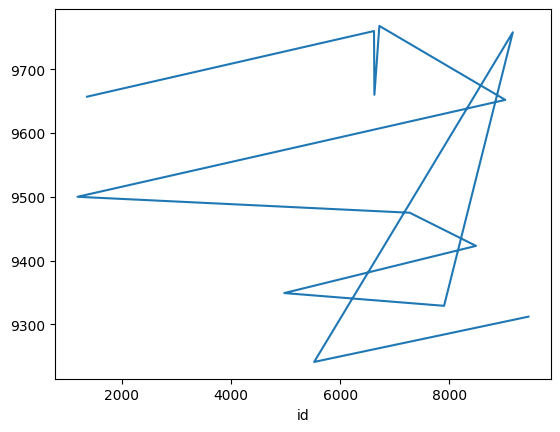

In [177]:
dataVideoValues["Valence Rank"].plot()


<AxesSubplot: >

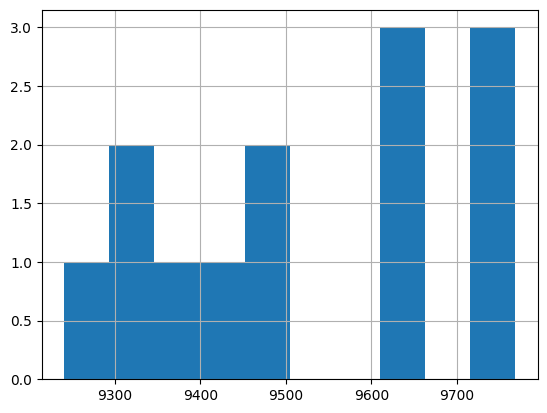

In [178]:
dataVideoValues["Valence Rank"].hist()


<AxesSubplot: xlabel='id'>

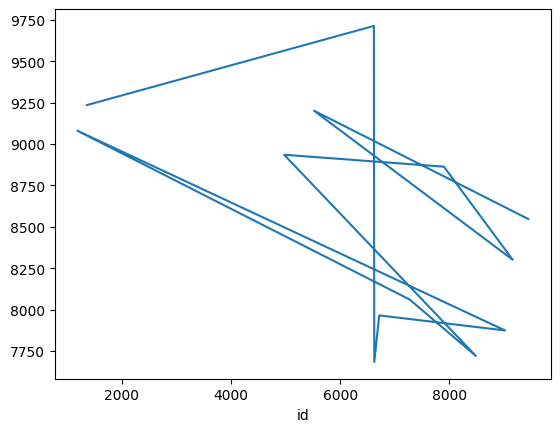

In [179]:
dataVideoValues["Arousal Rank"].plot()


<AxesSubplot: >

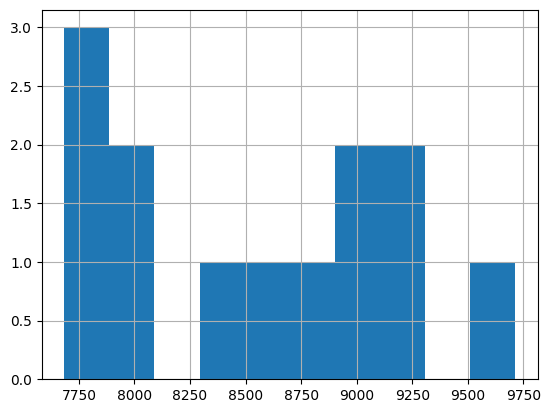

In [180]:
dataVideoValues["Arousal Rank"].hist()


<AxesSubplot: xlabel='id'>

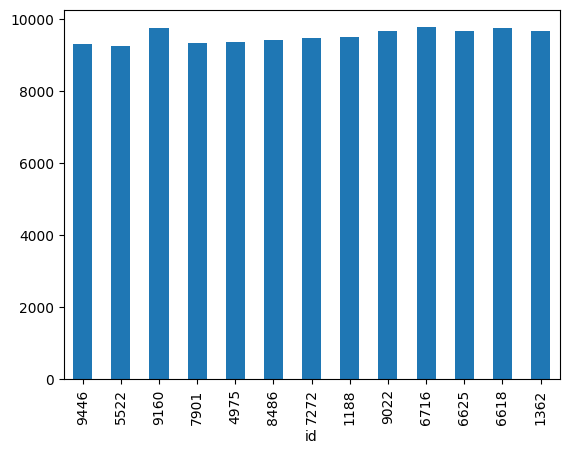

In [181]:
dataVideoValues["Arousal Rank"].plot(kind="bar")
dataVideoValues["Valence Rank"].plot(kind="bar")


## Practical Task No. 2. Signal filtering

#### Simple Moving Average:


SMA is calculated by taking the mean of a size of the window observations at a time that is present in the current window. It is used for analyzing trends. It goes through the time series from the time T + window size and aggregates values from the current time T and window size – 1 steps back. Usually, we take an average from this window as the expected value (thus, we have the Moving Average algorithm). 

Median filtering is better if we are removing rare events, outliers, from our dataset.
Average filter is better for volatile and high-frequency datasets.

In [185]:
window_size = 5


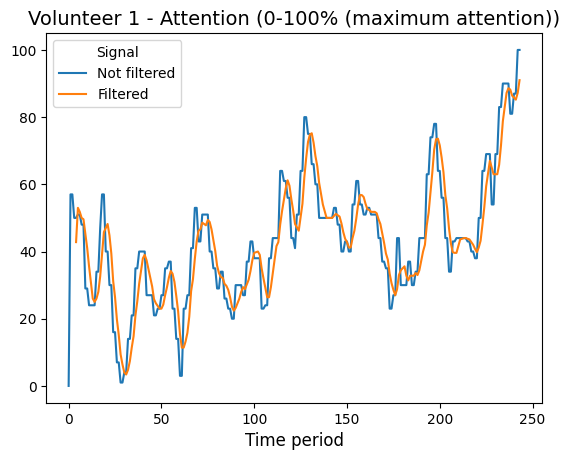

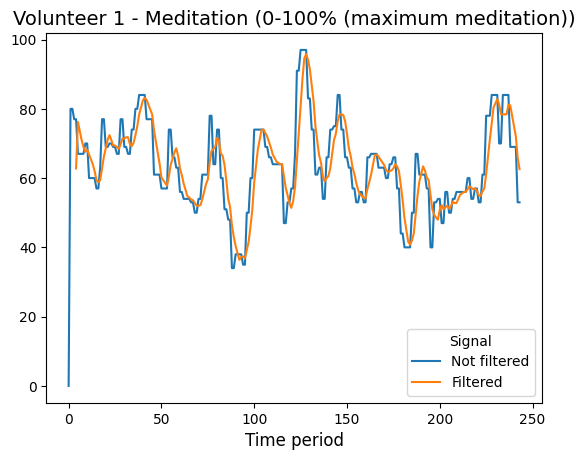

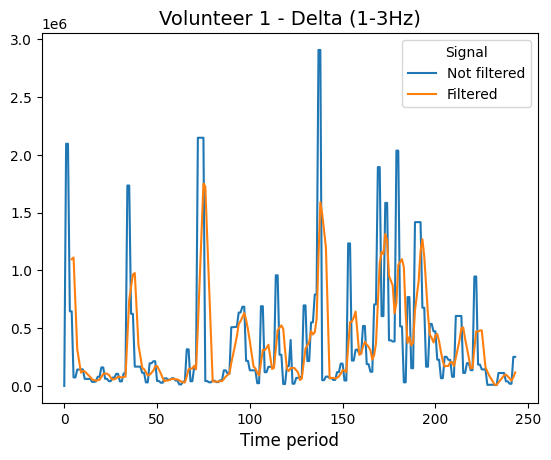

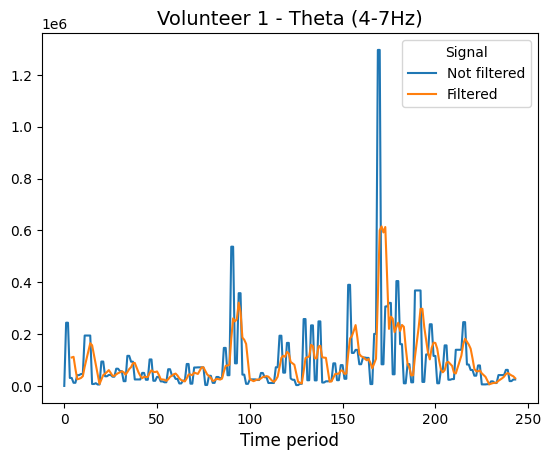

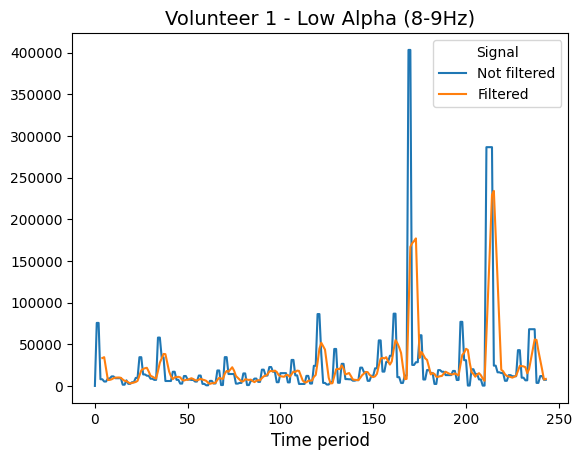

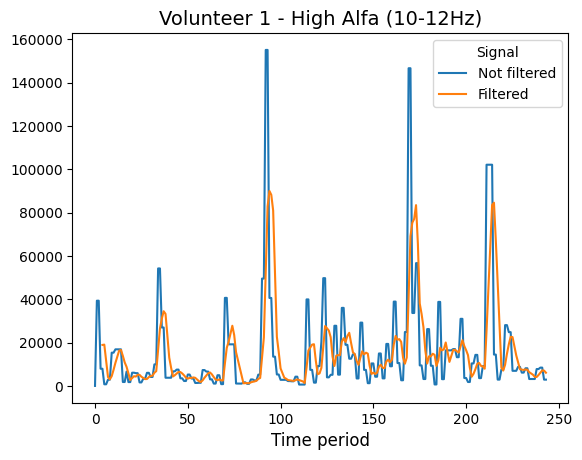

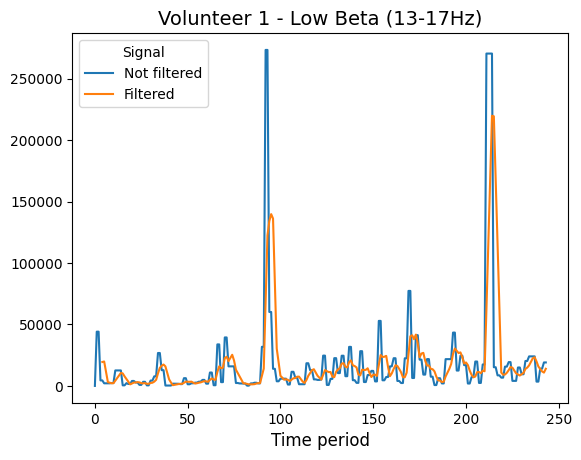

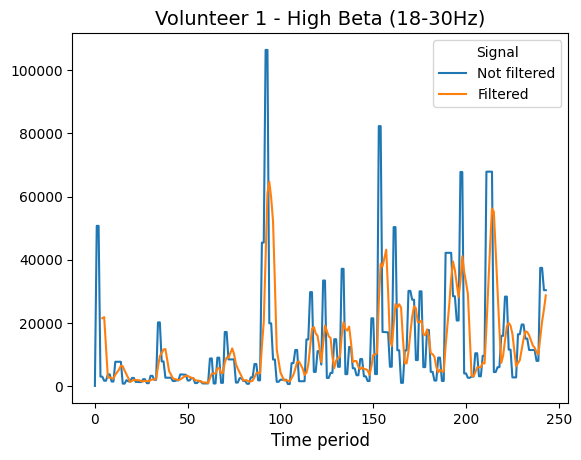

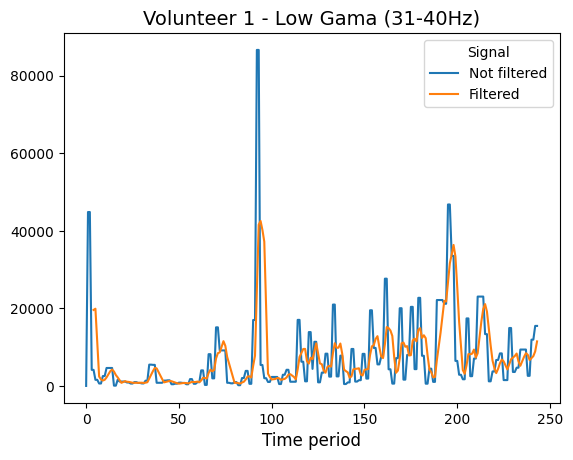

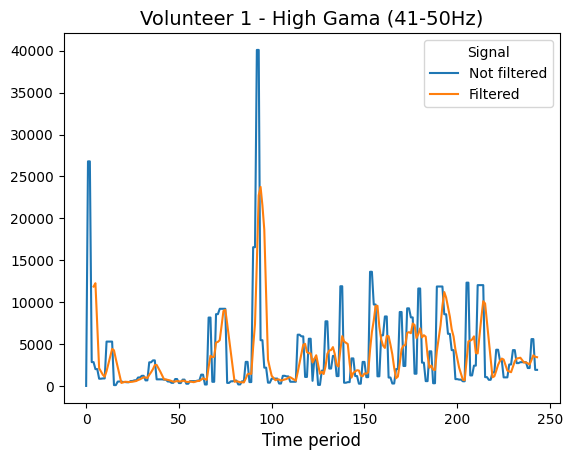

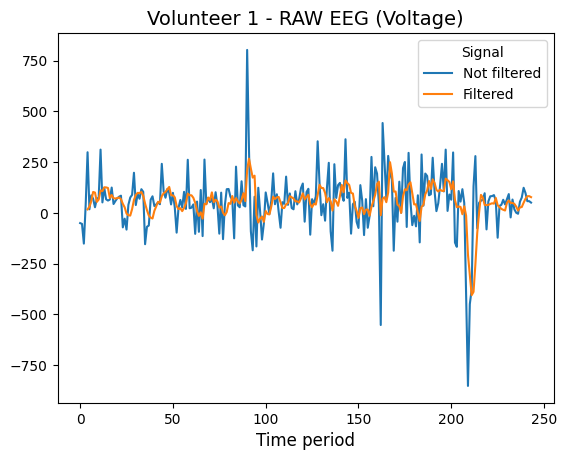

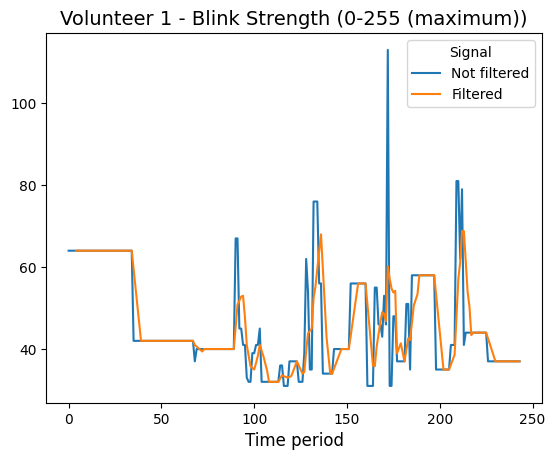

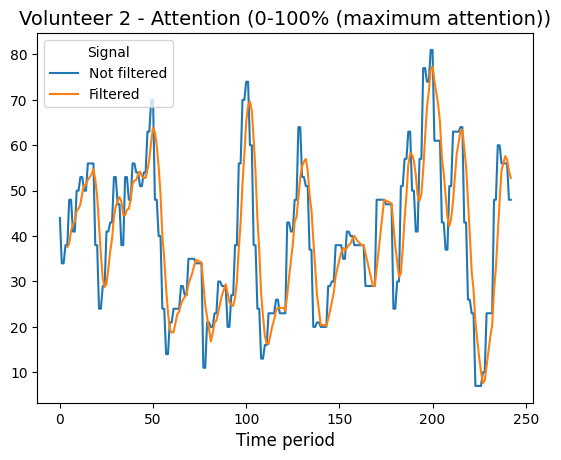

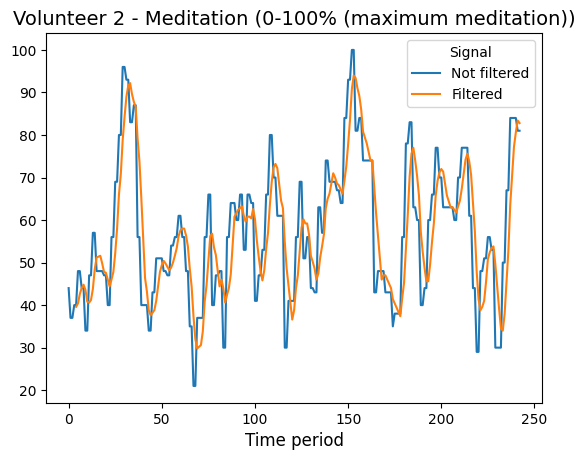

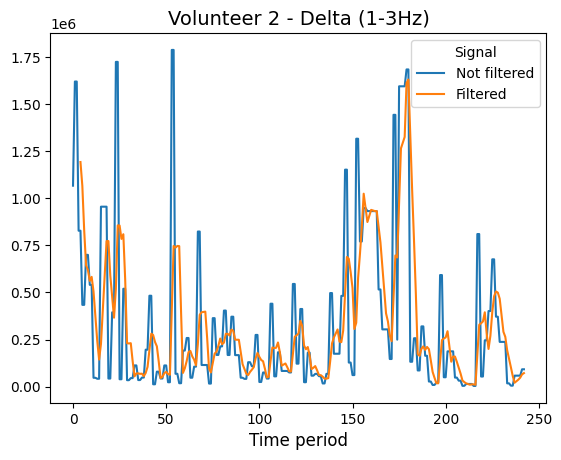

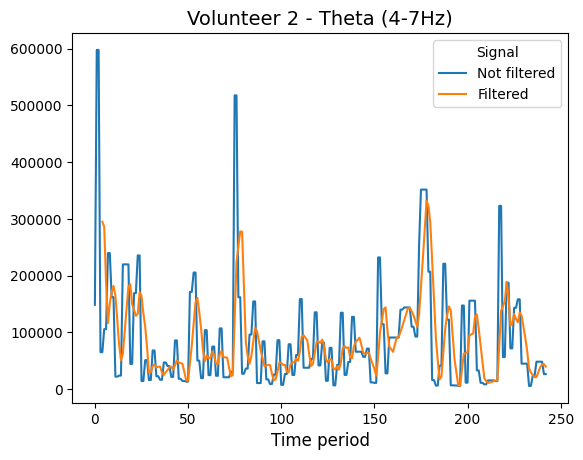

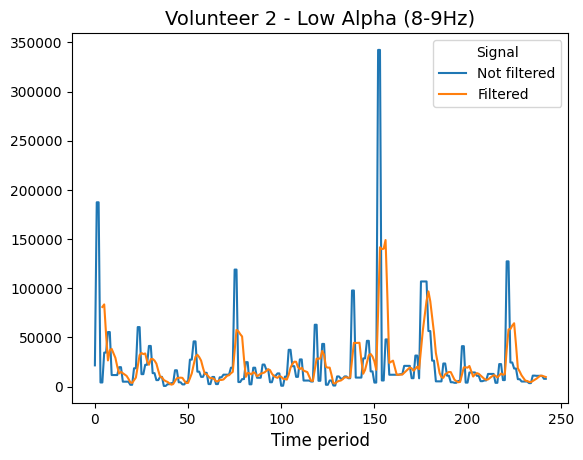

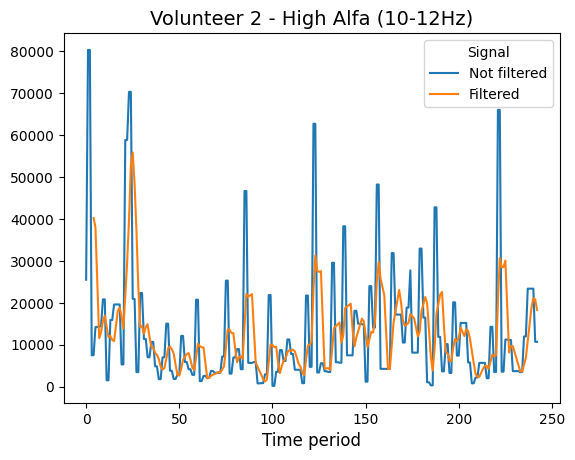

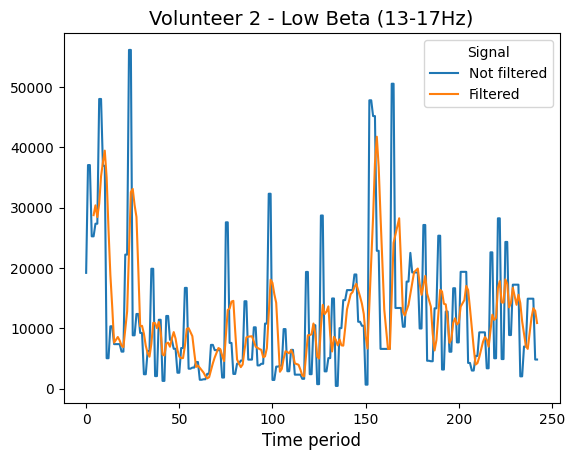

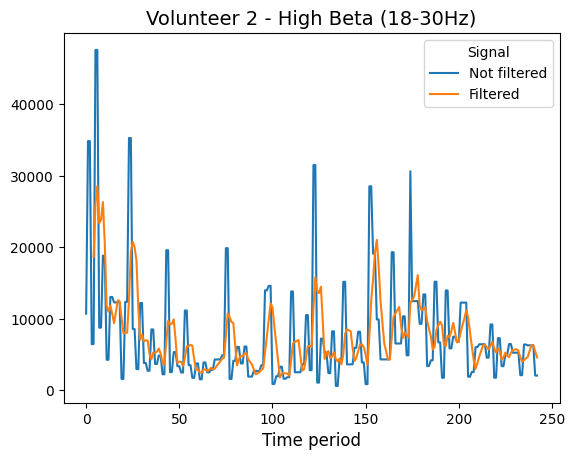

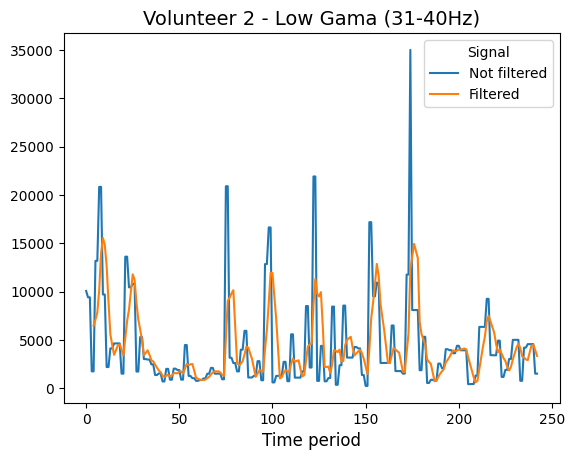

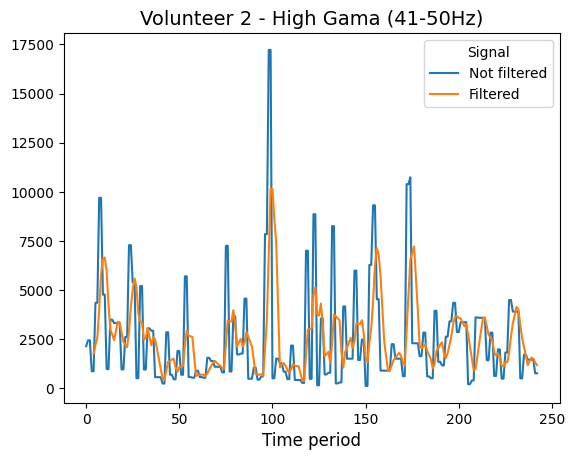

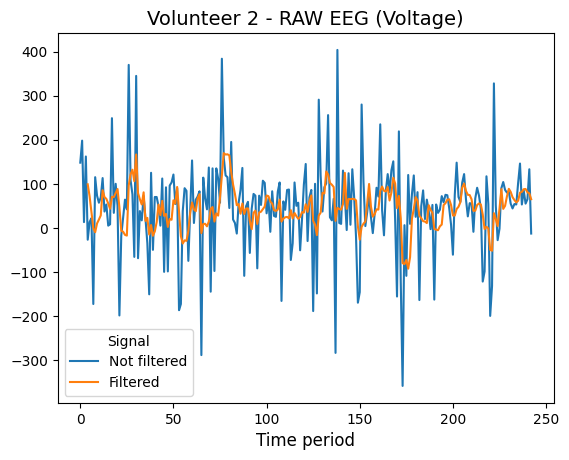

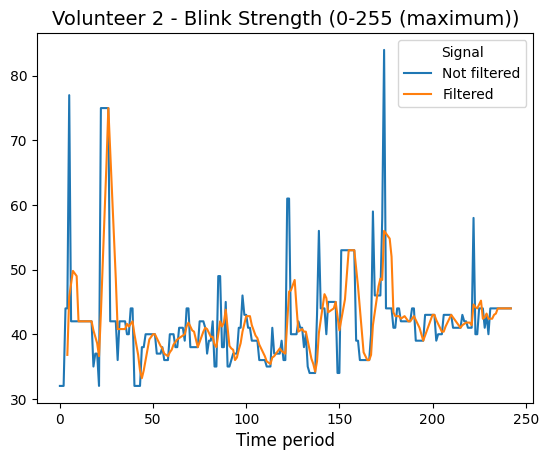

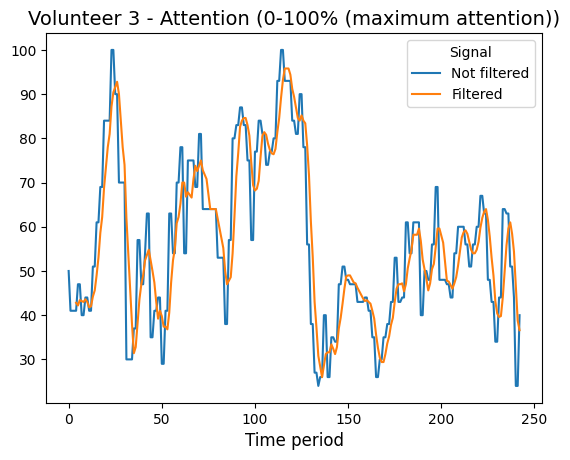

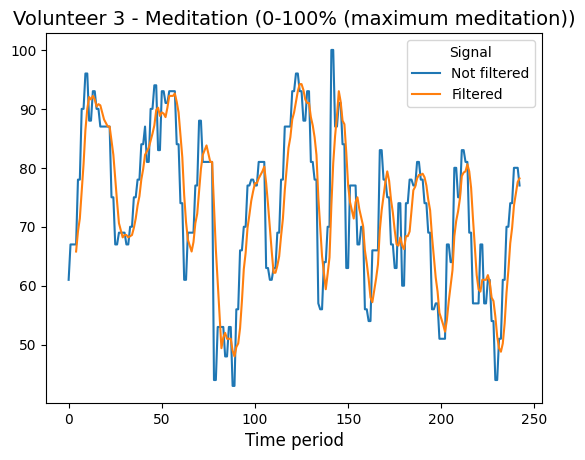

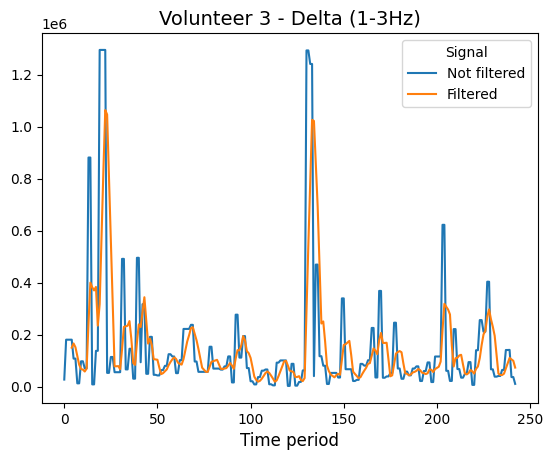

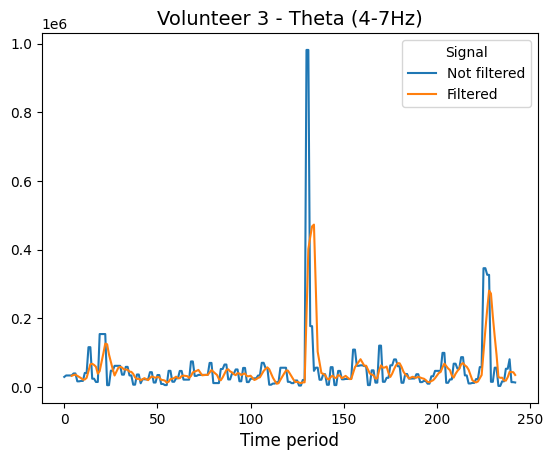

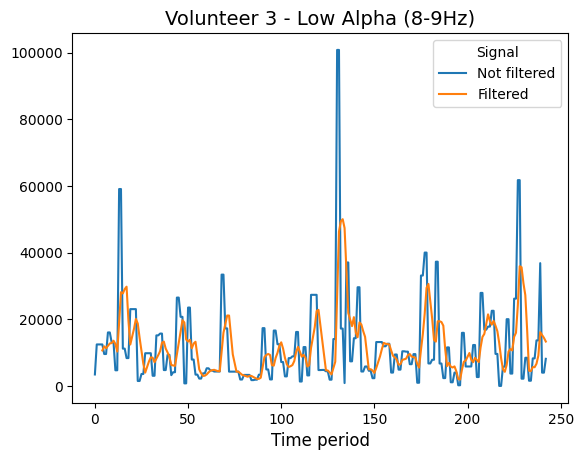

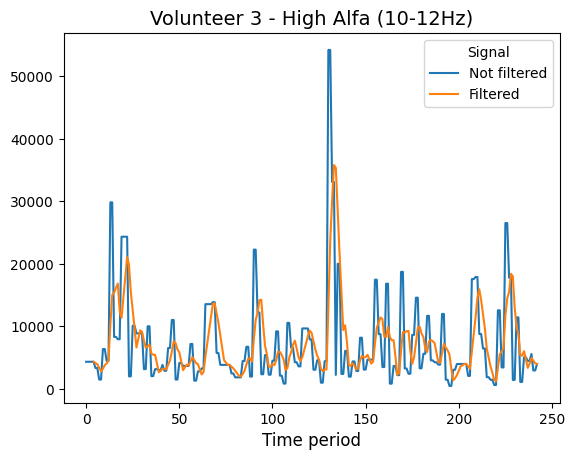

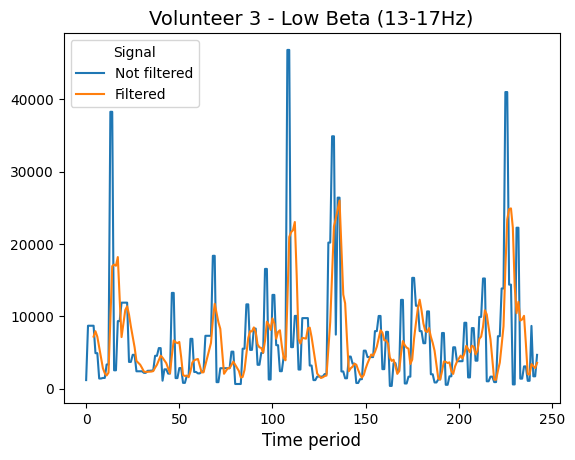

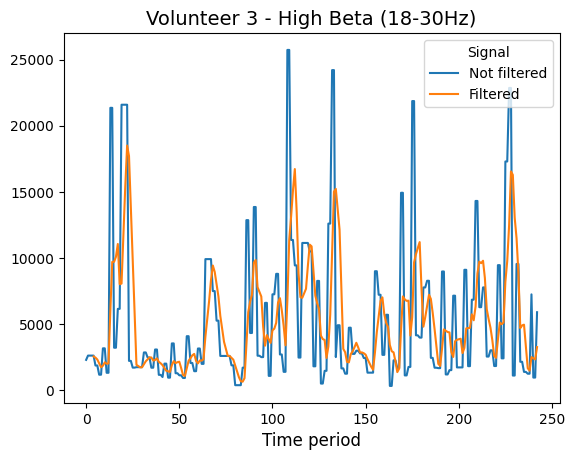

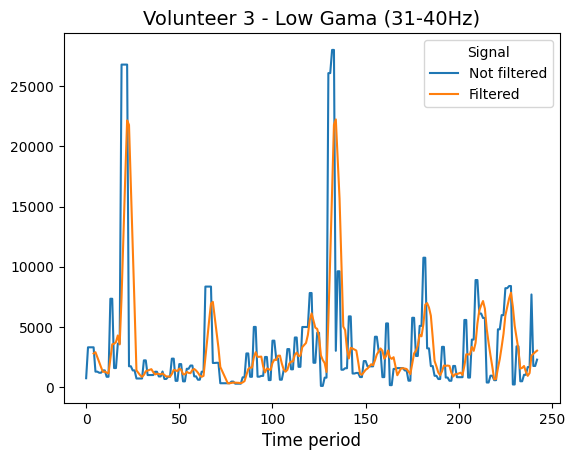

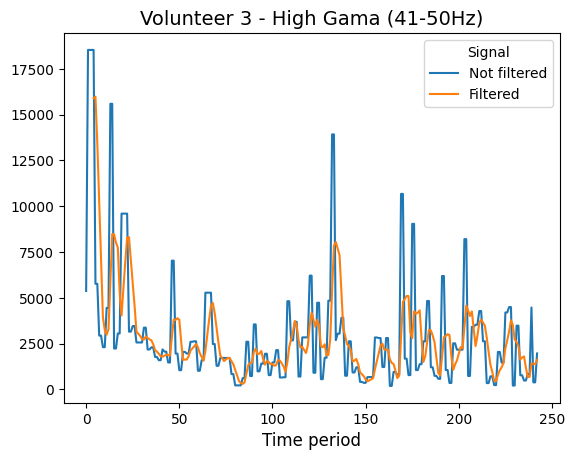

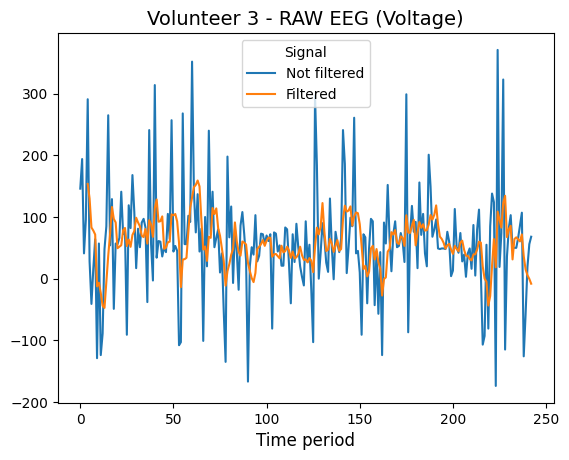

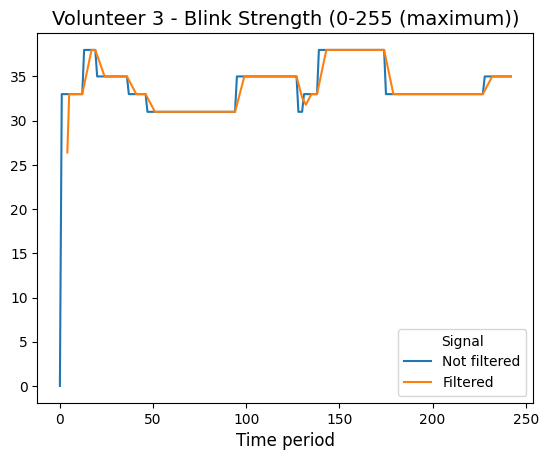

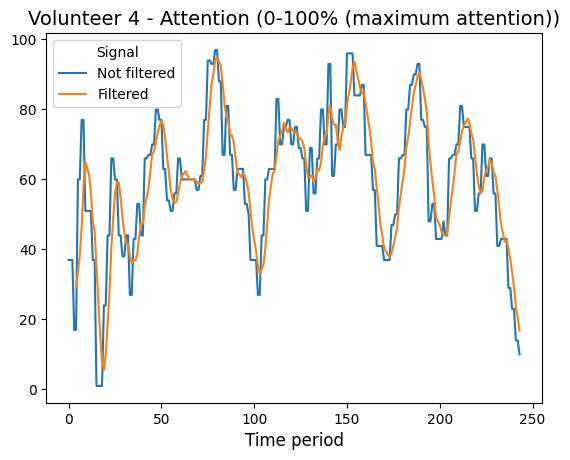

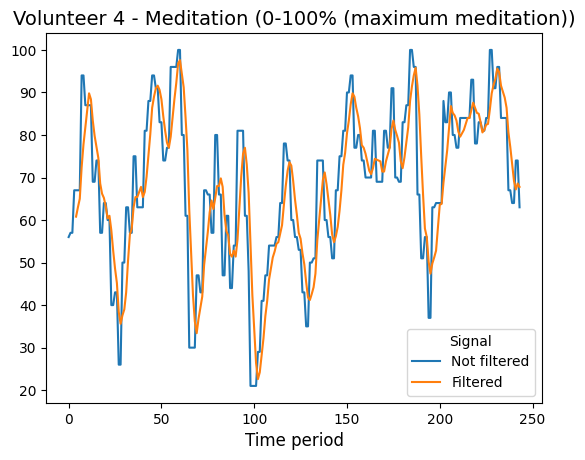

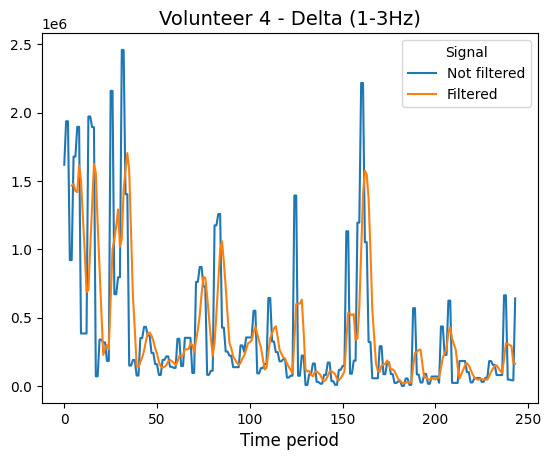

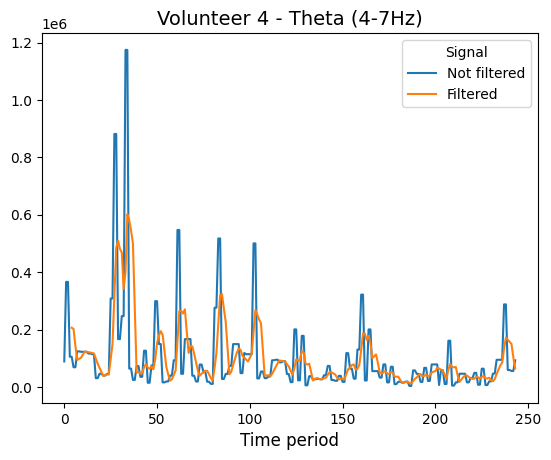

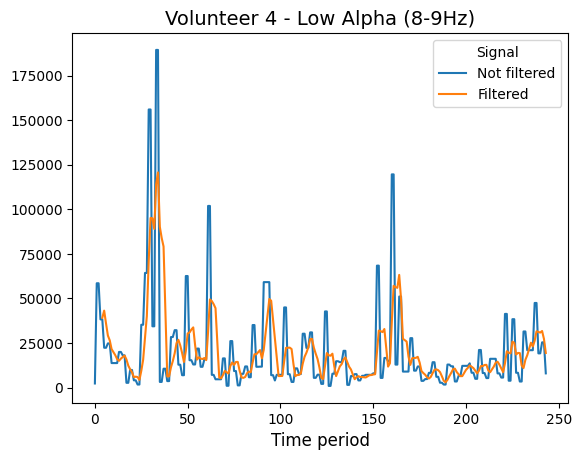

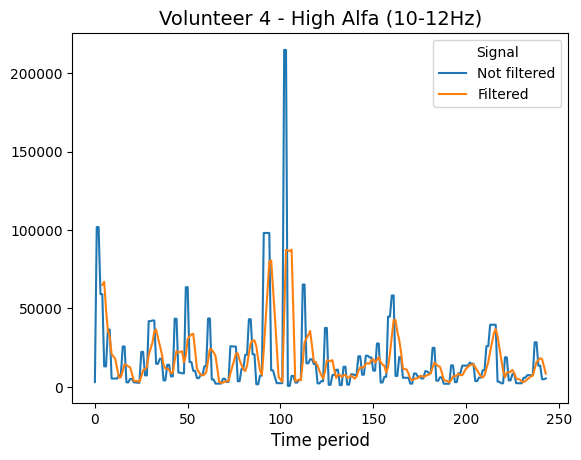

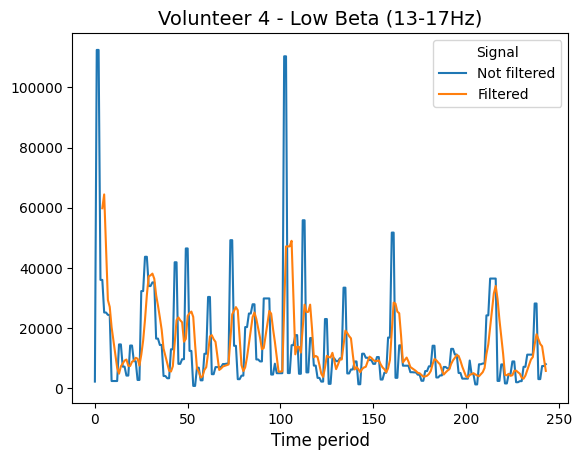

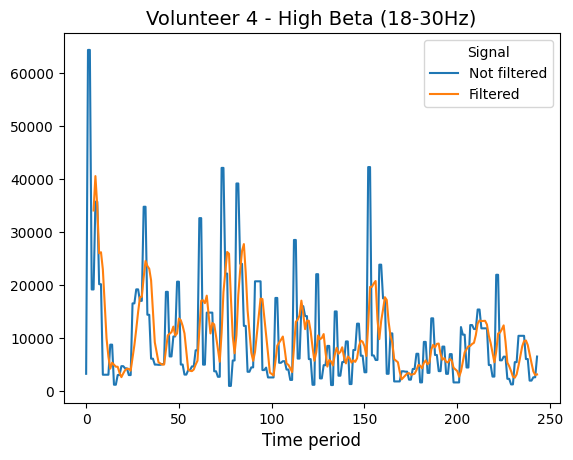

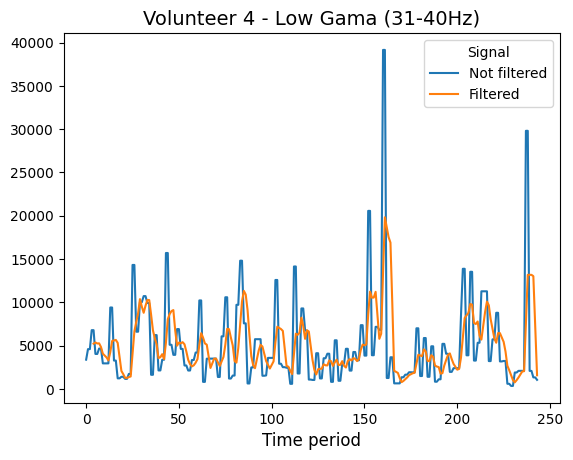

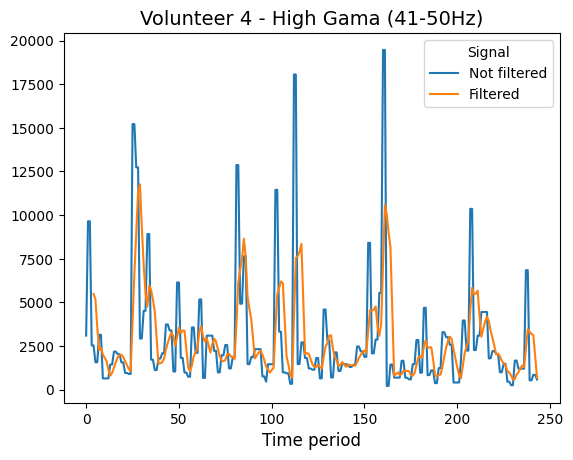

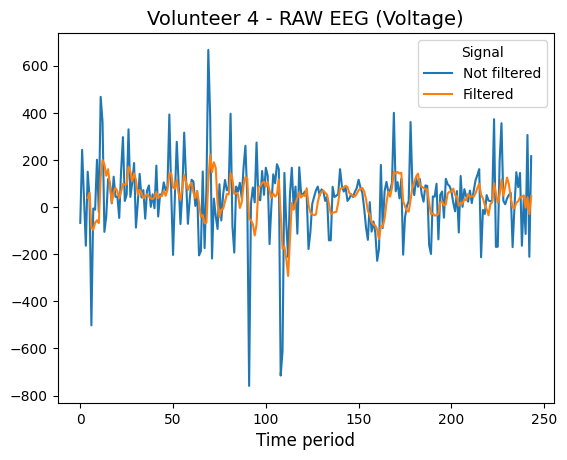

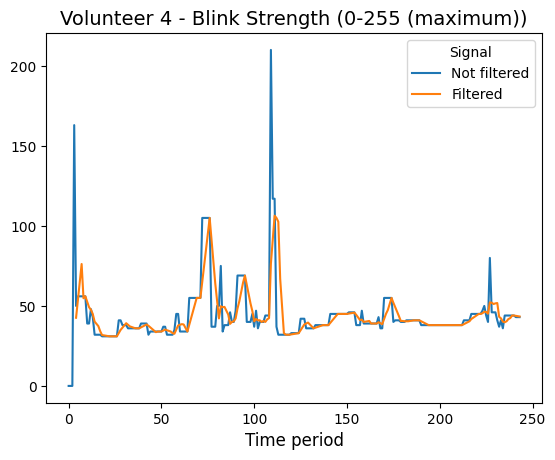

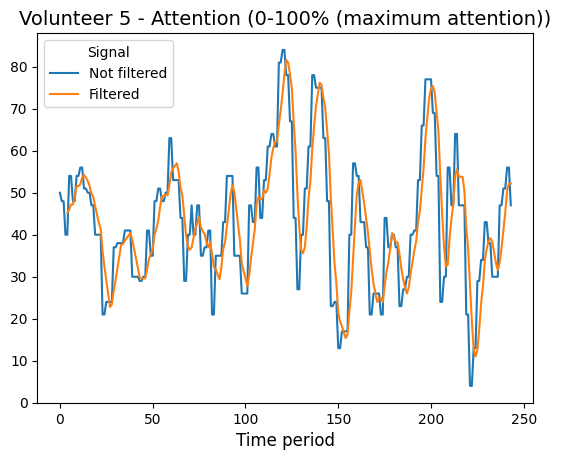

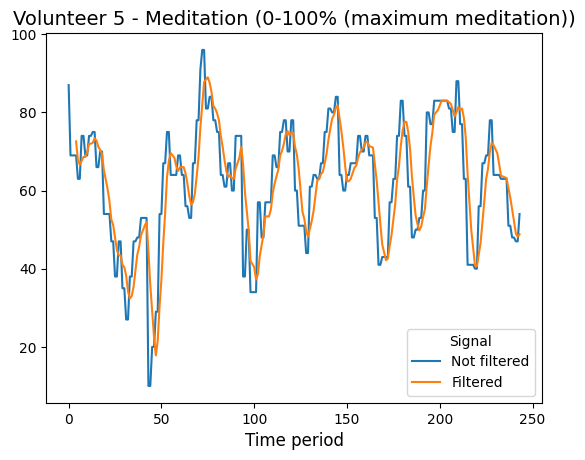

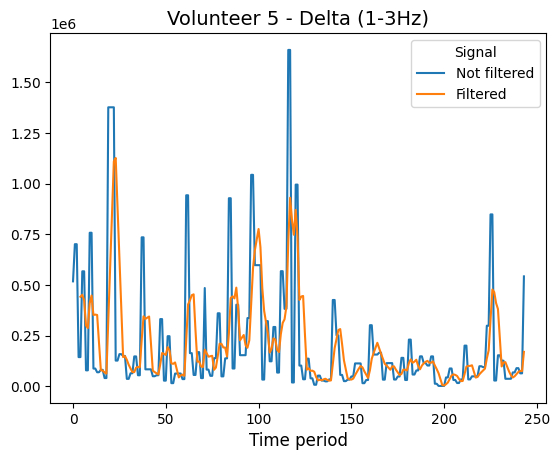

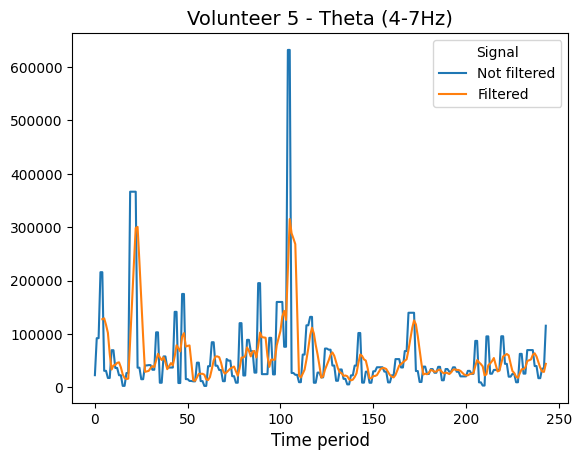

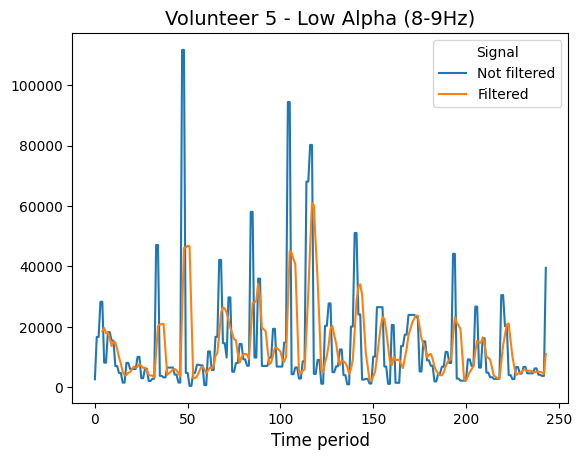

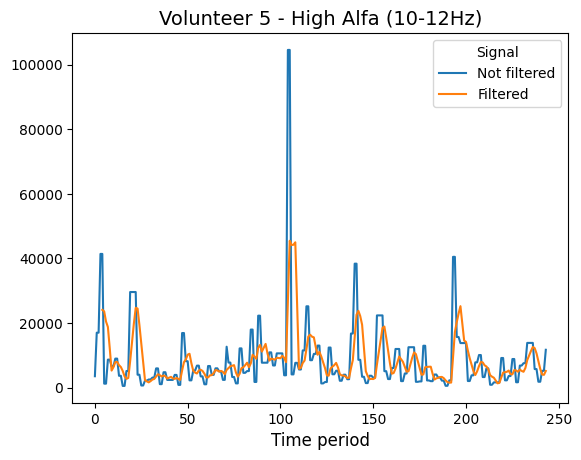

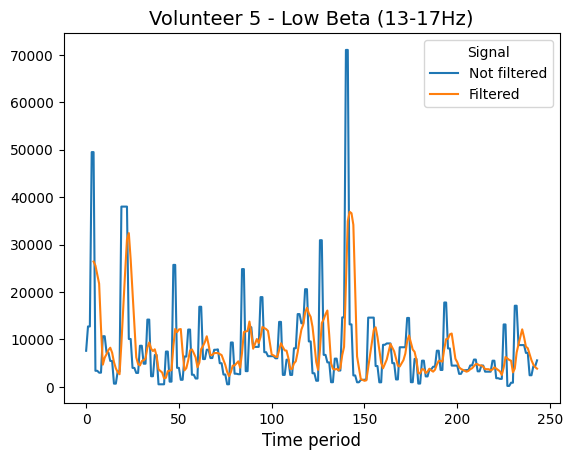

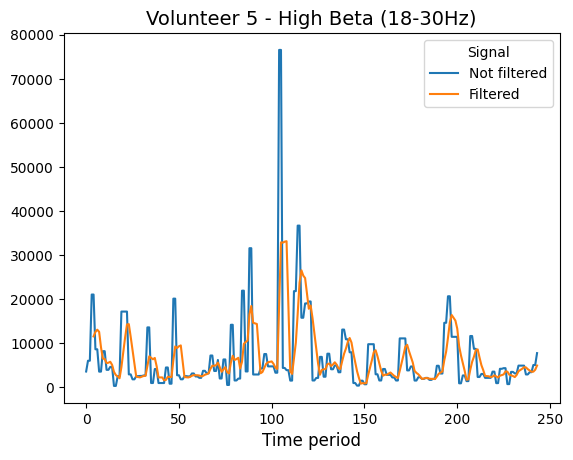

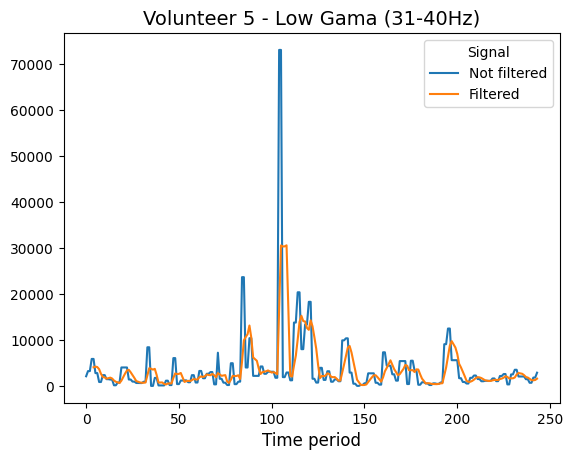

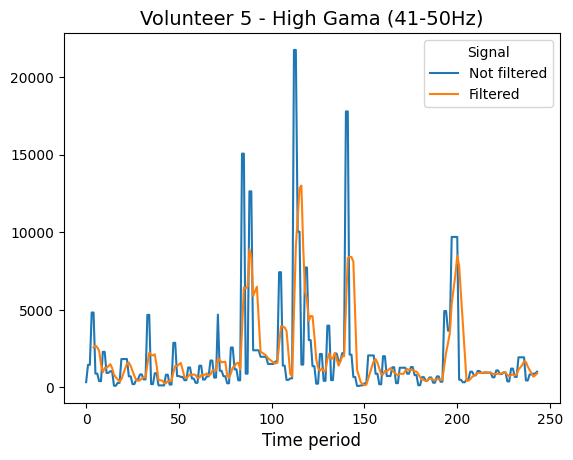

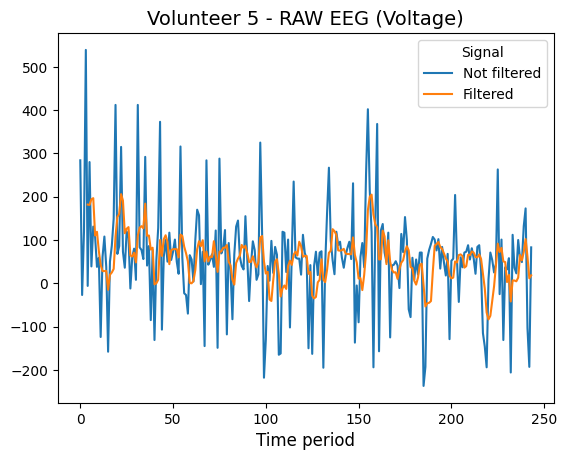

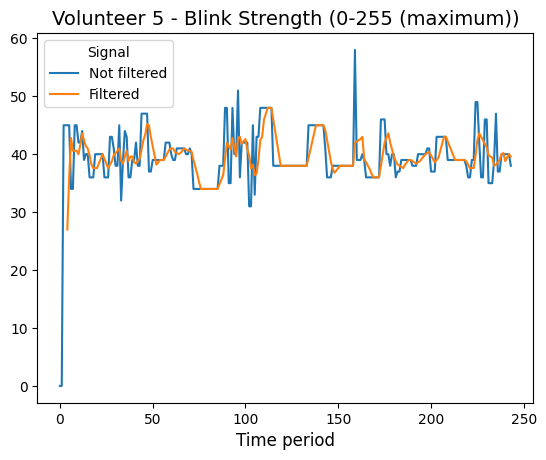

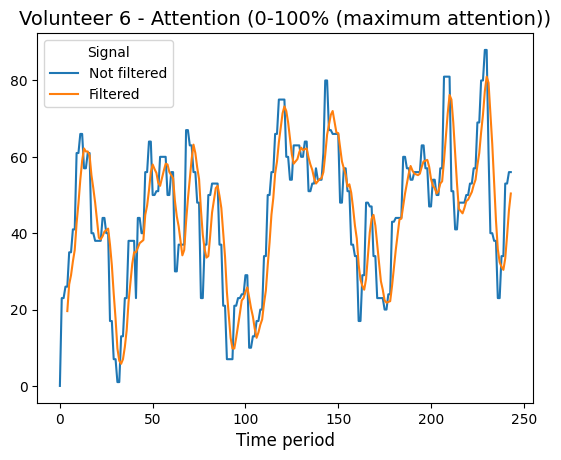

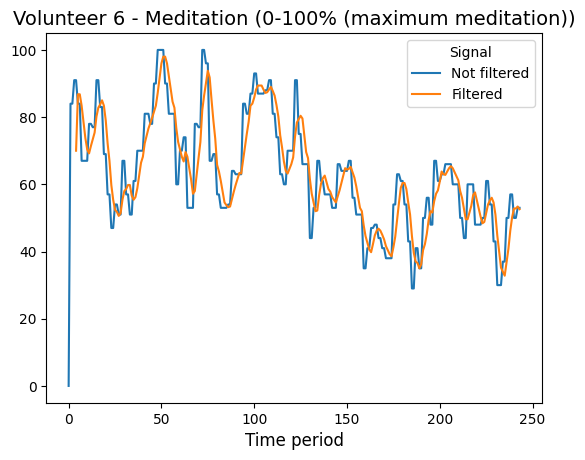

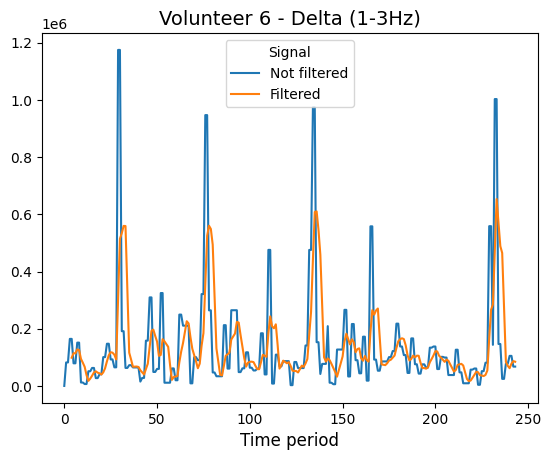

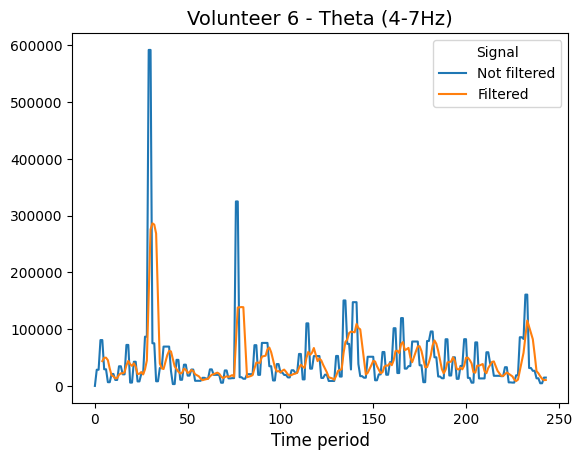

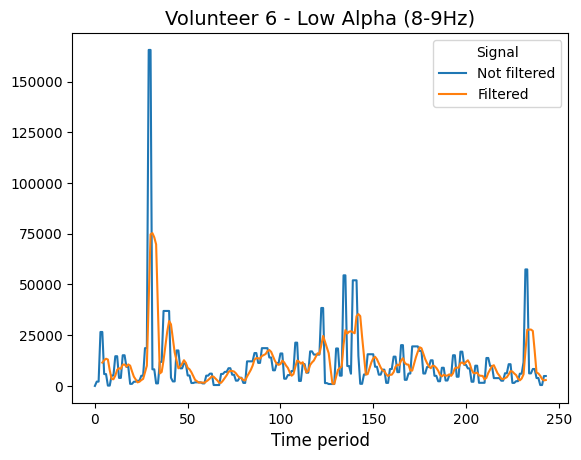

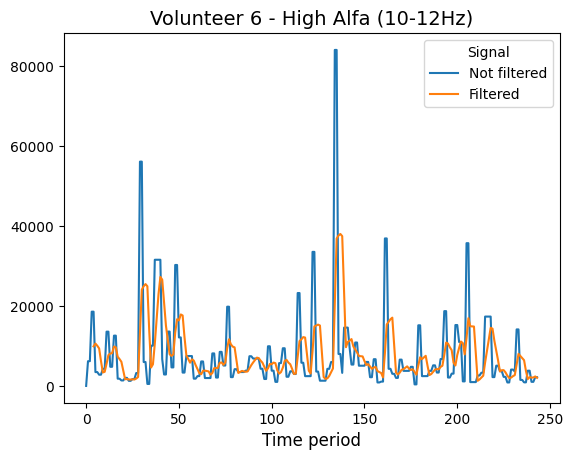

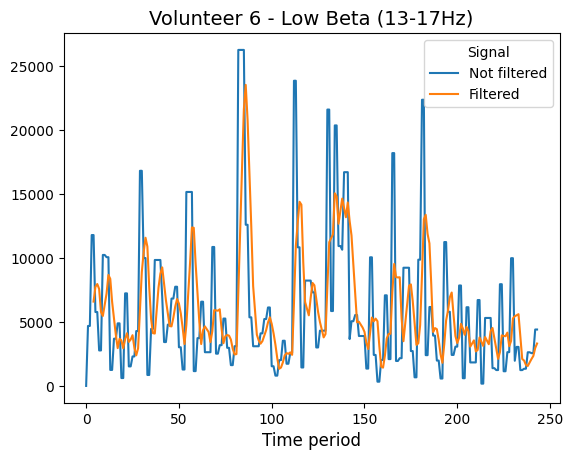

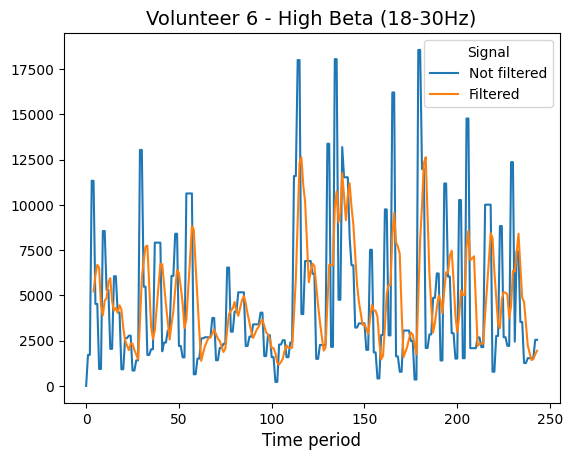

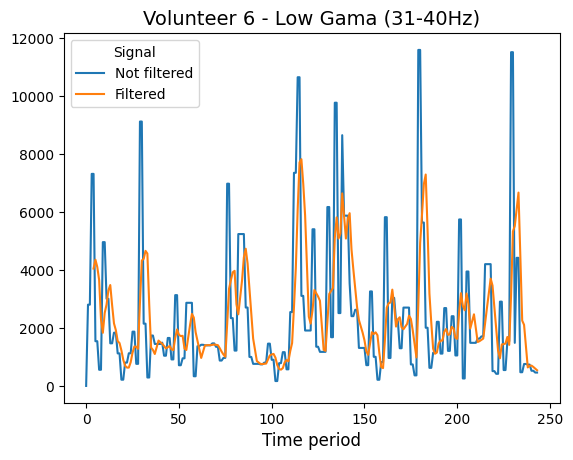

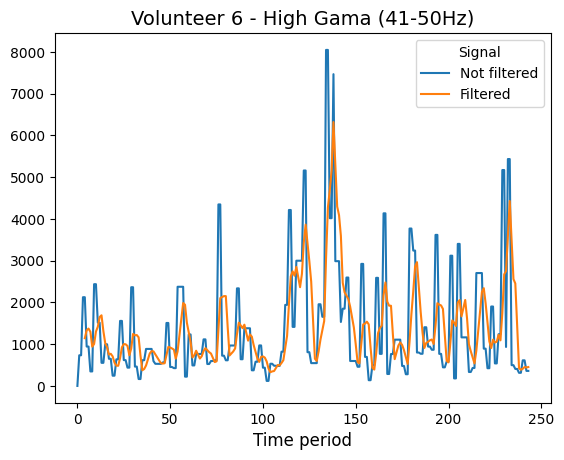

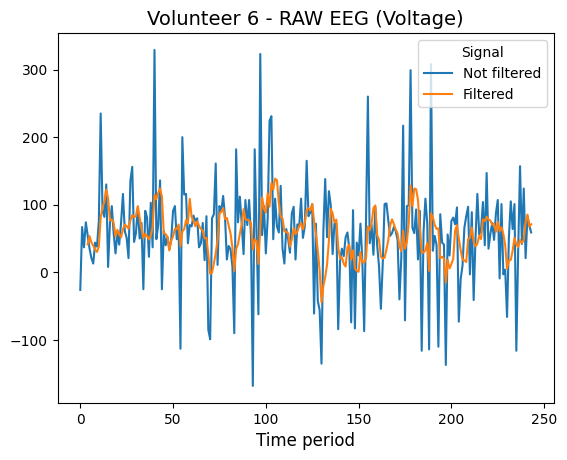

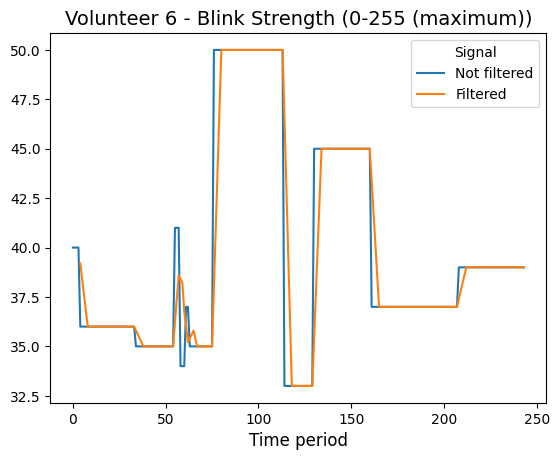

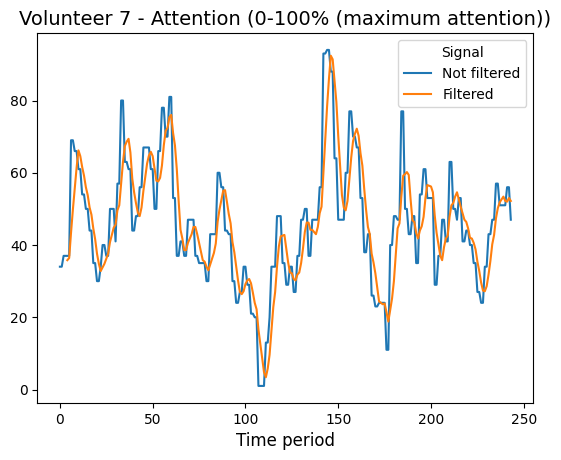

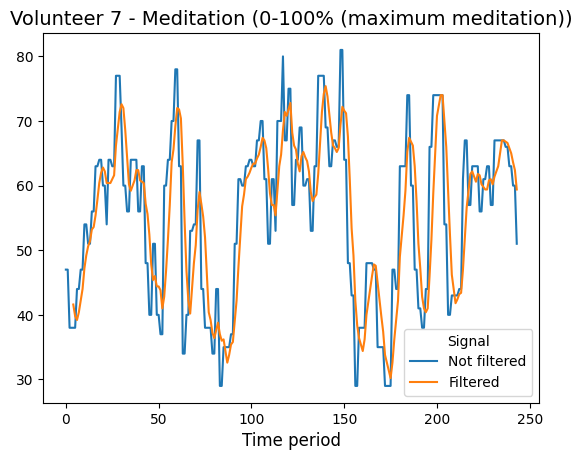

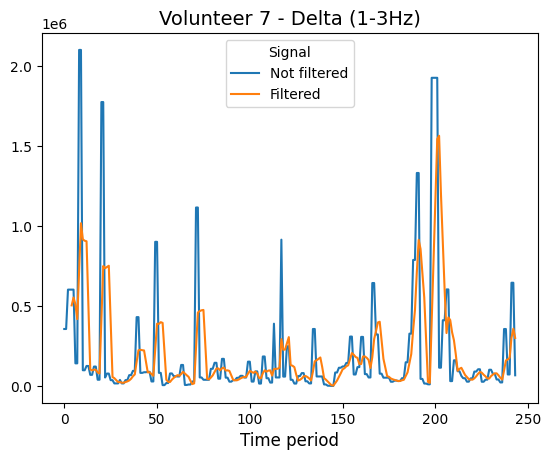

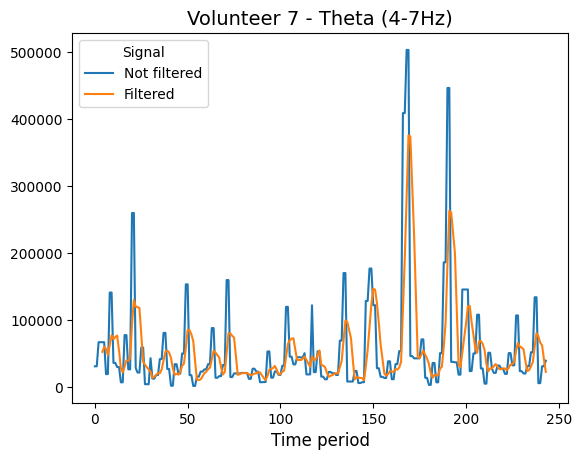

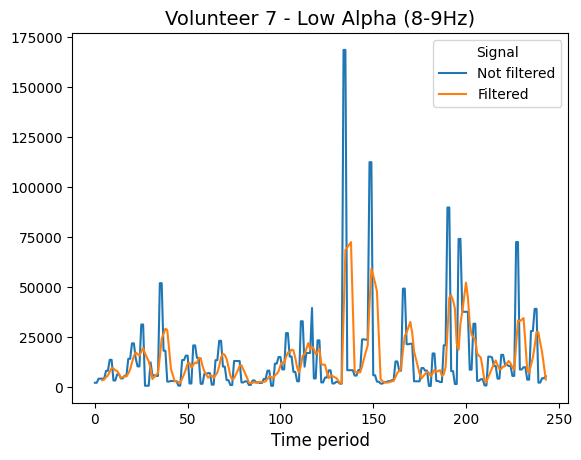

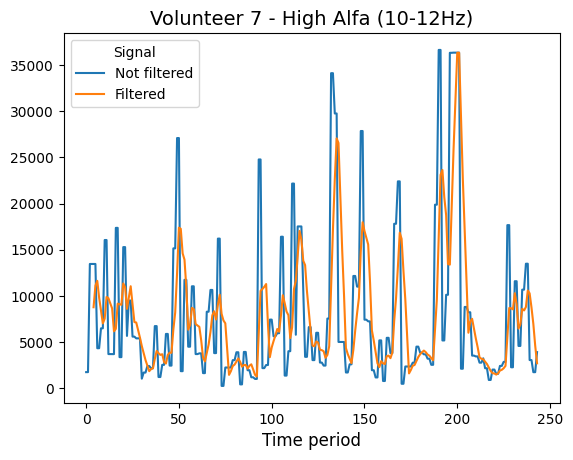

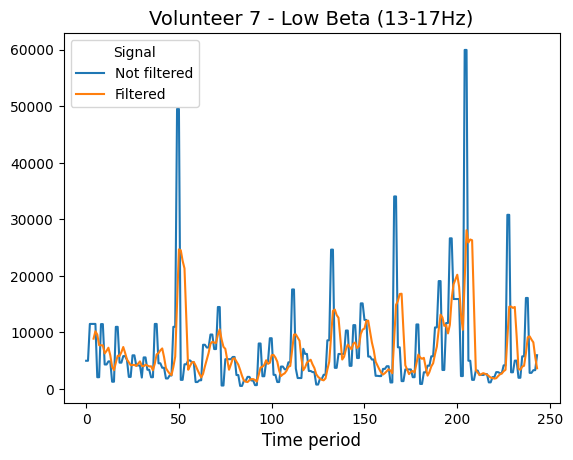

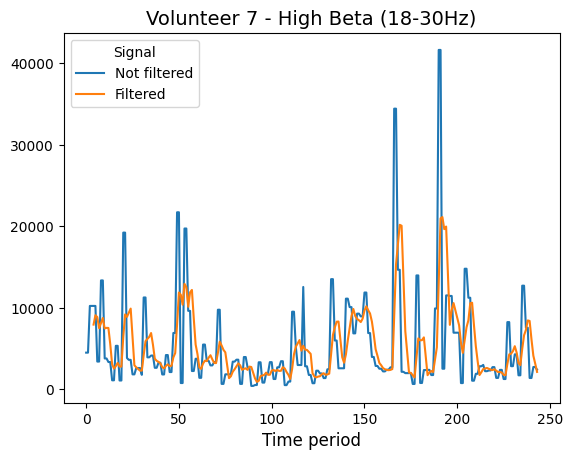

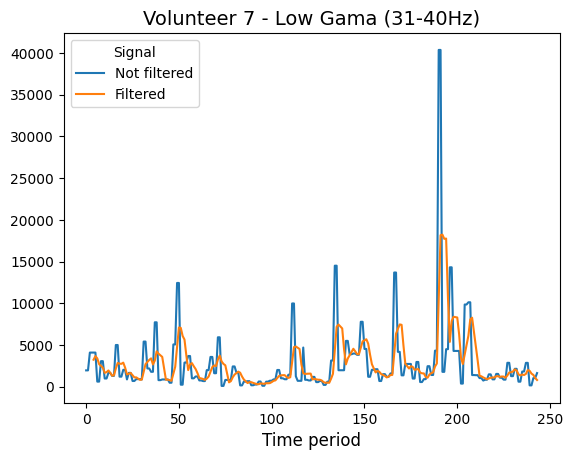

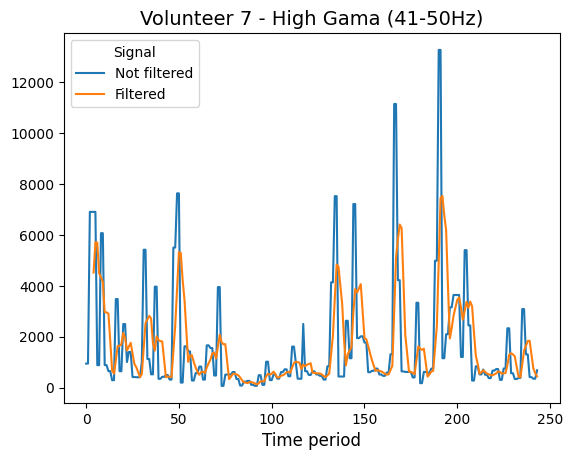

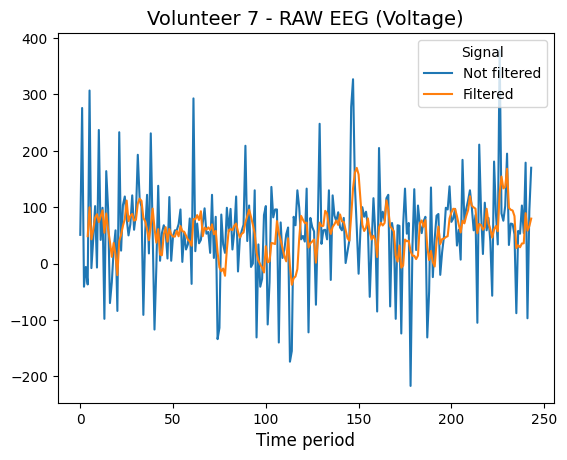

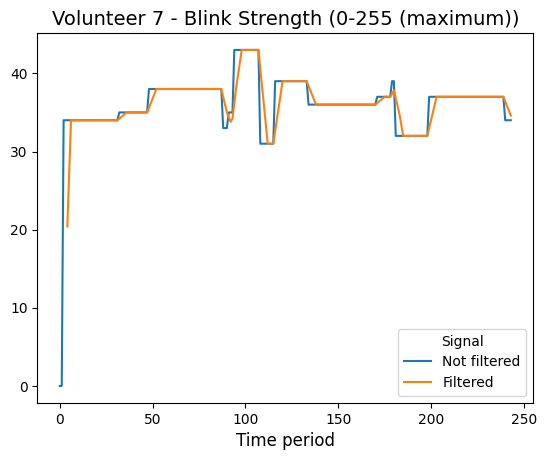

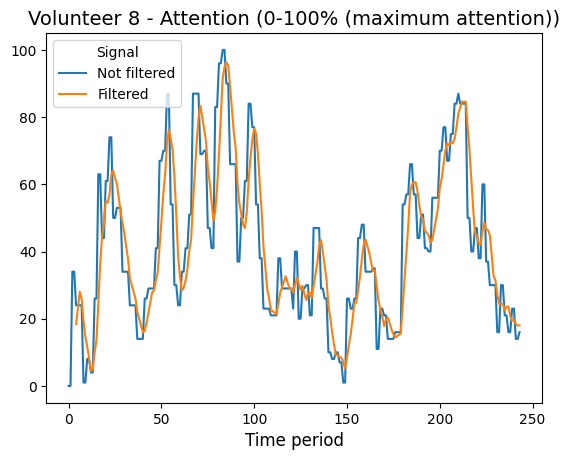

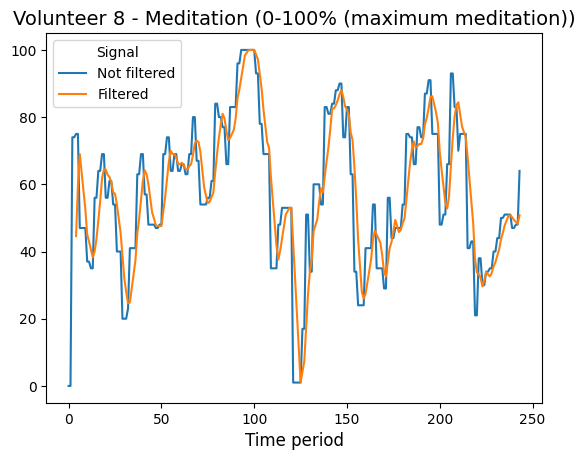

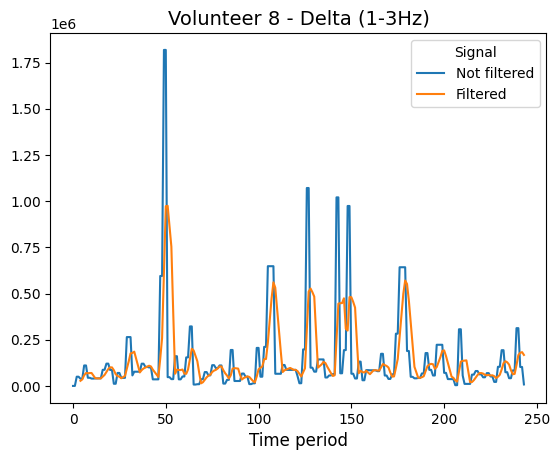

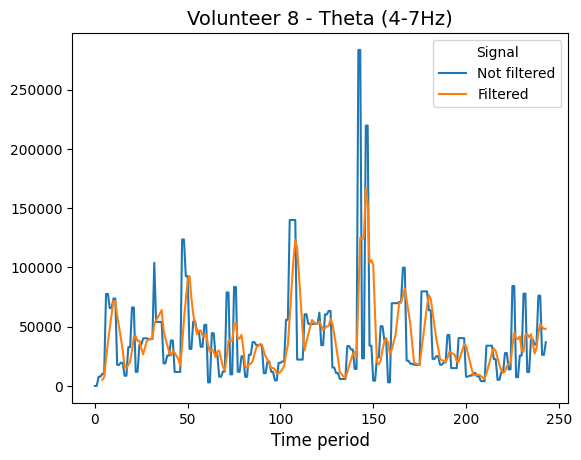

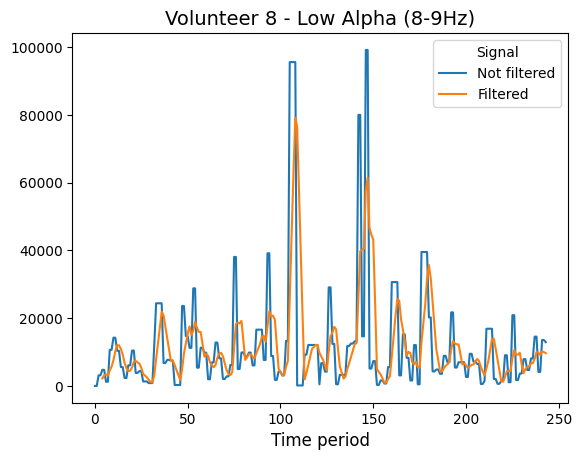

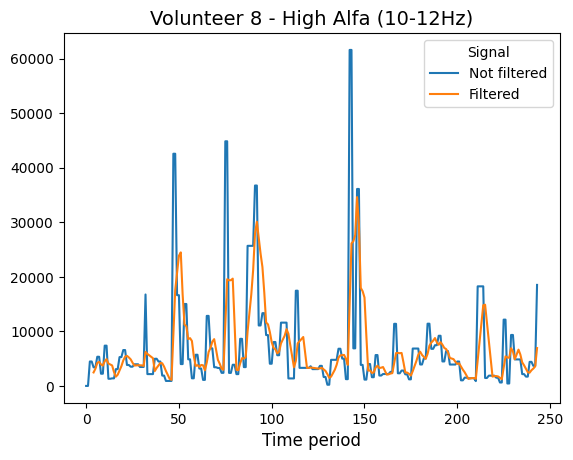

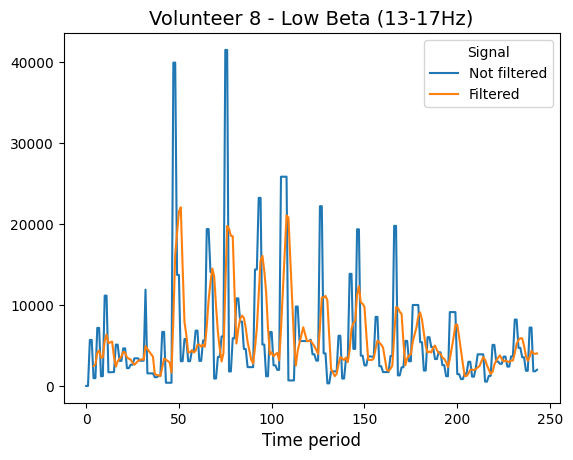

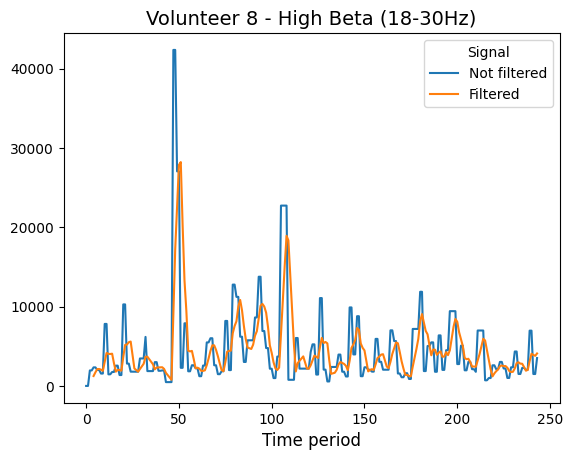

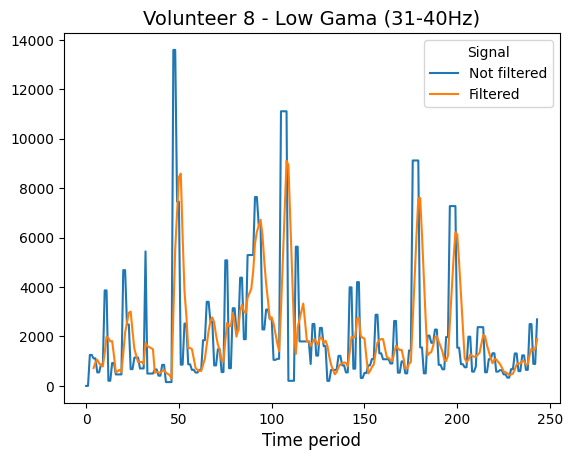

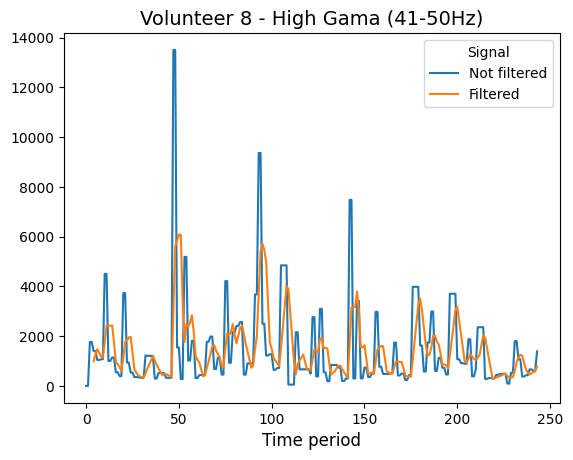

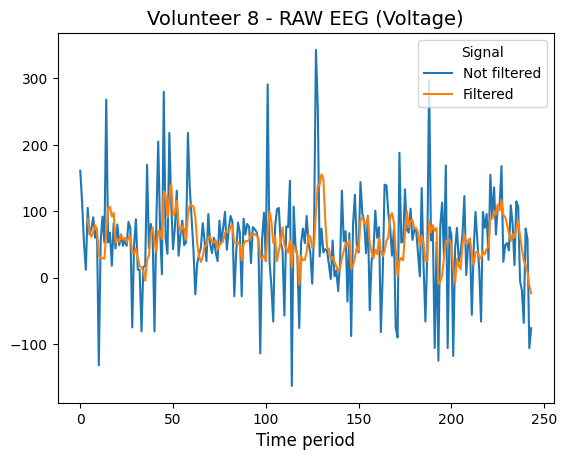

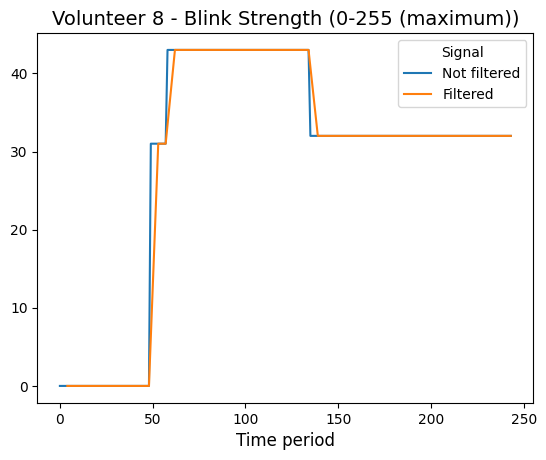

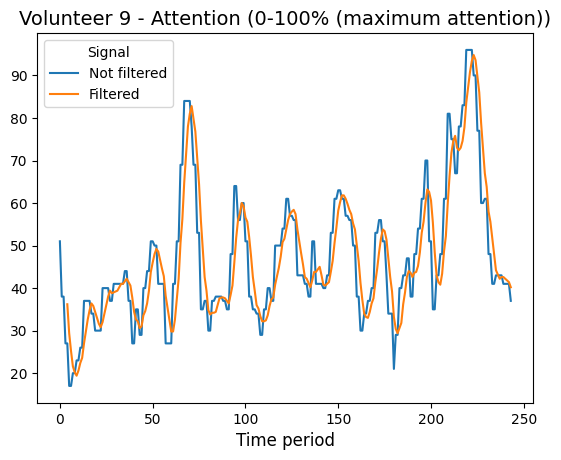

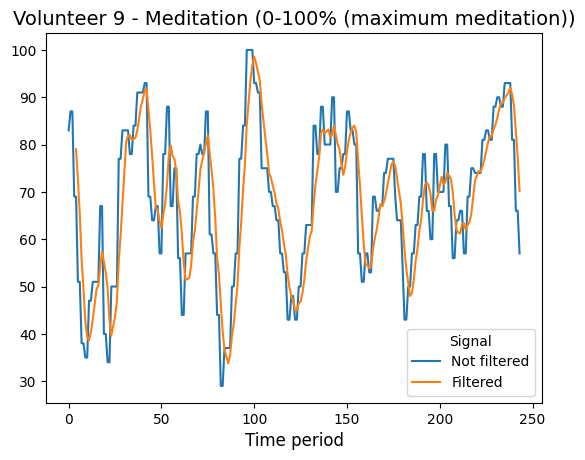

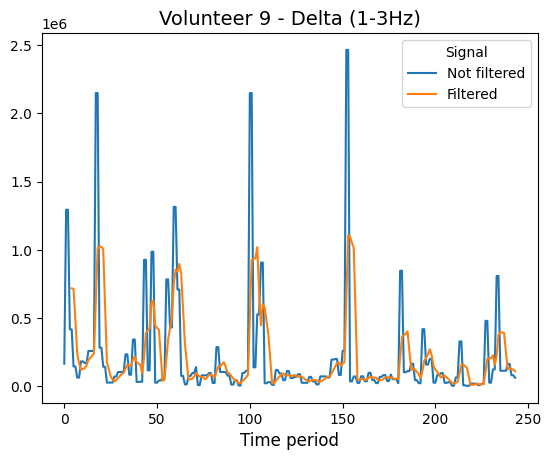

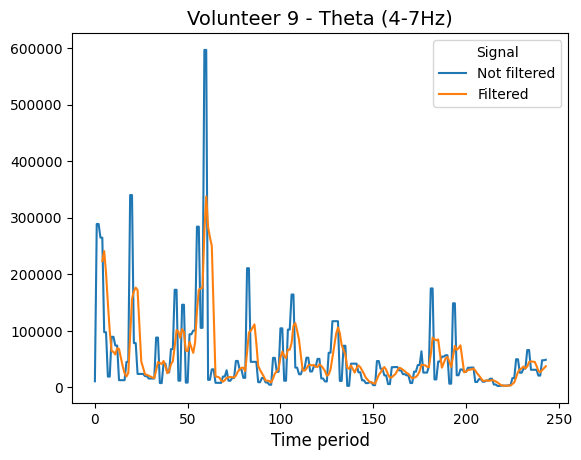

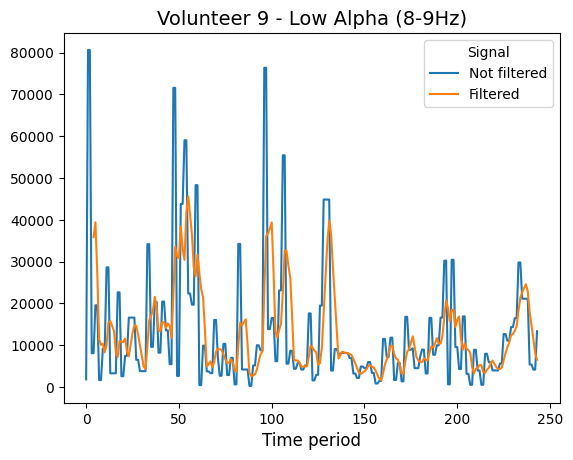

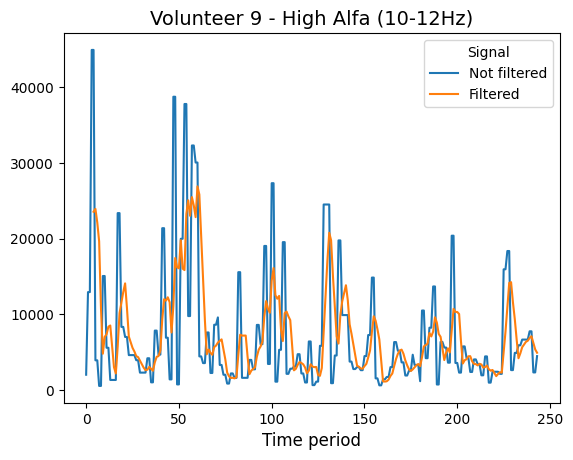

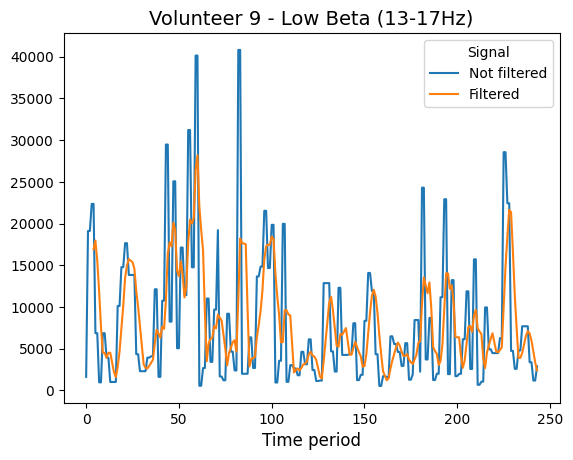

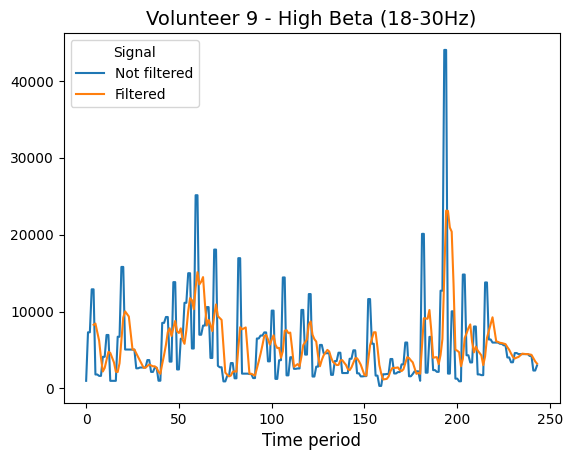

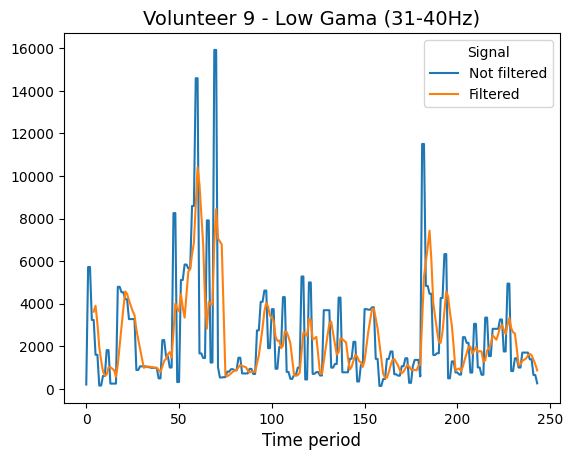

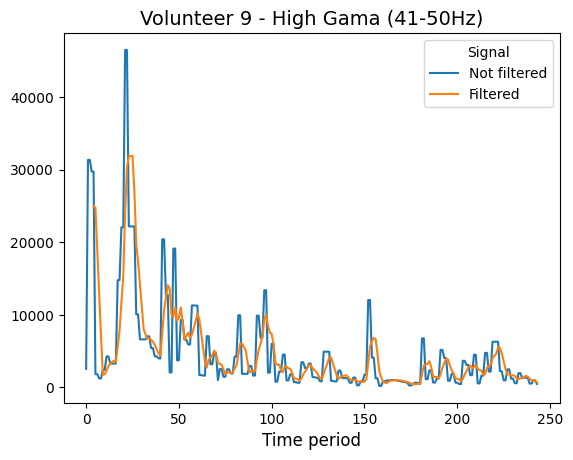

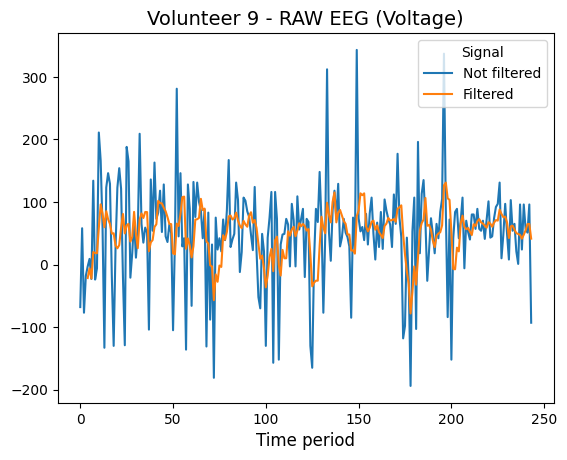

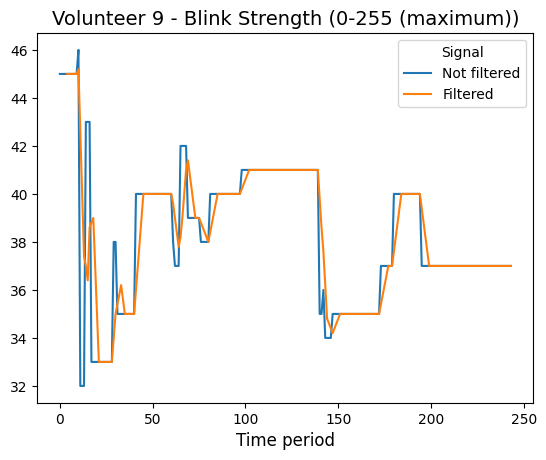

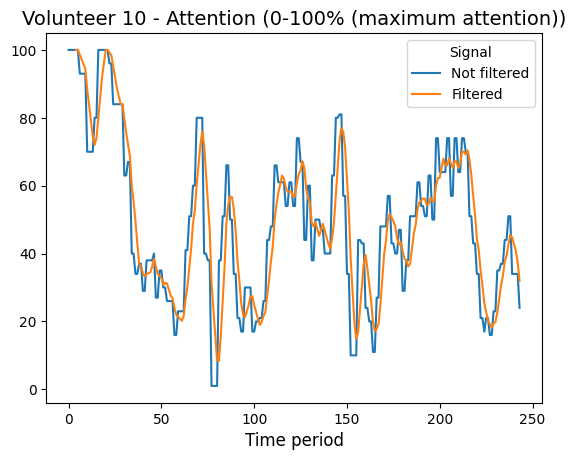

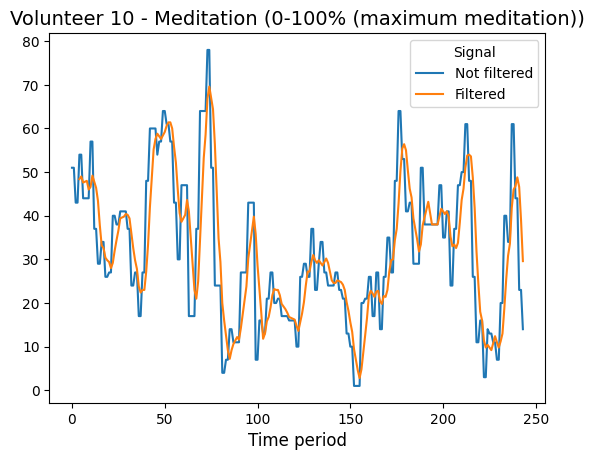

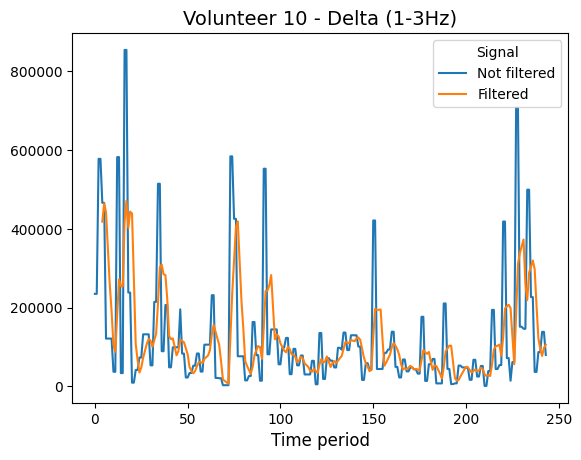

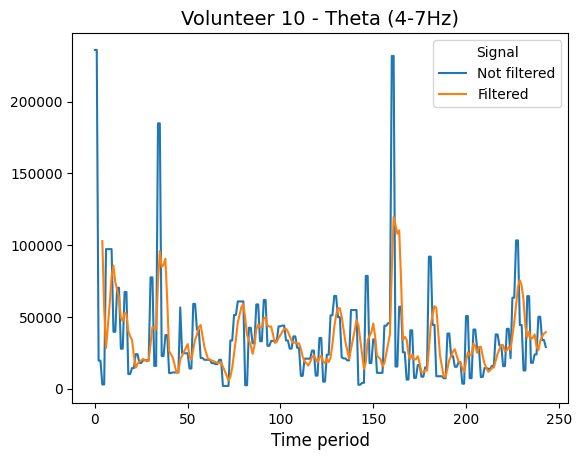

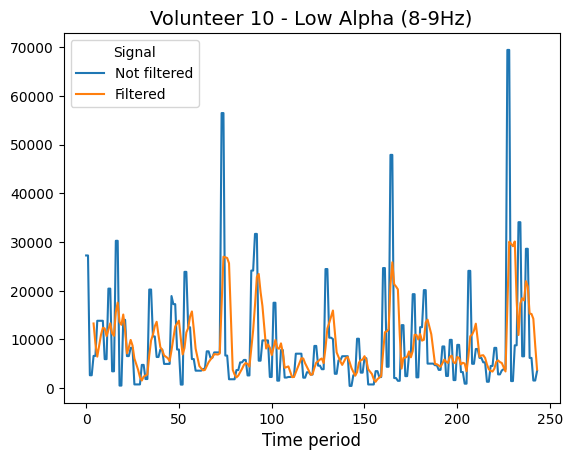

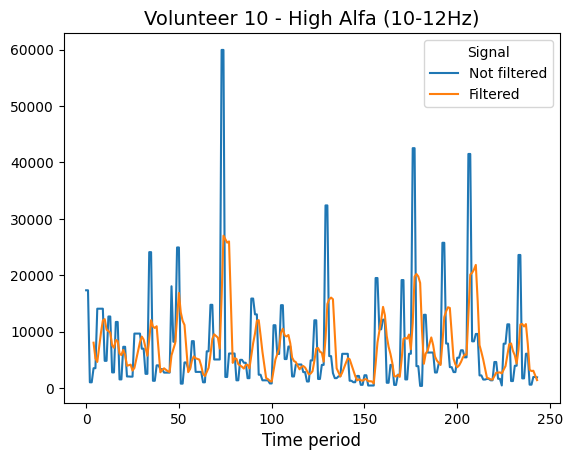

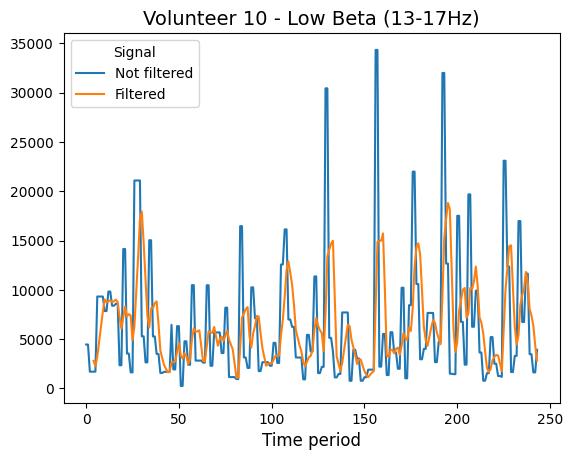

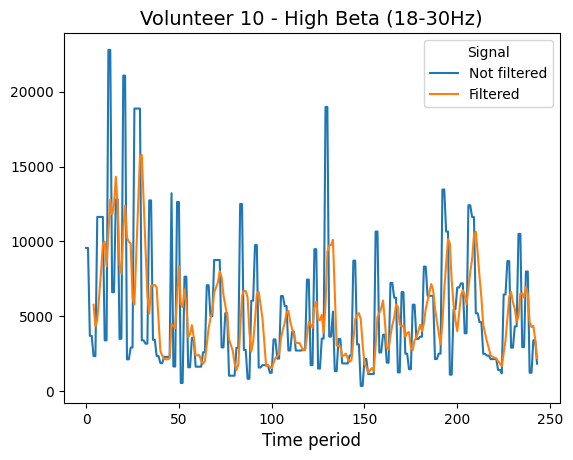

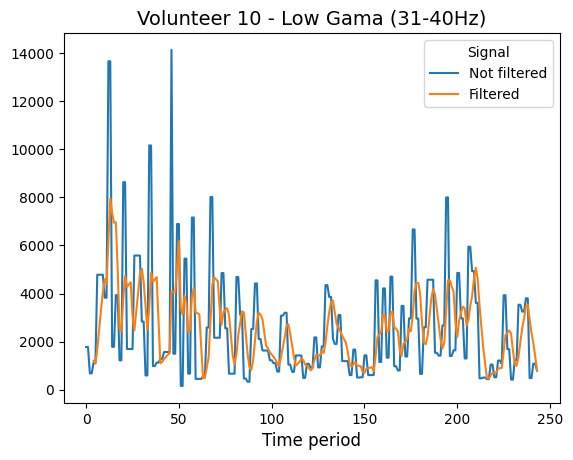

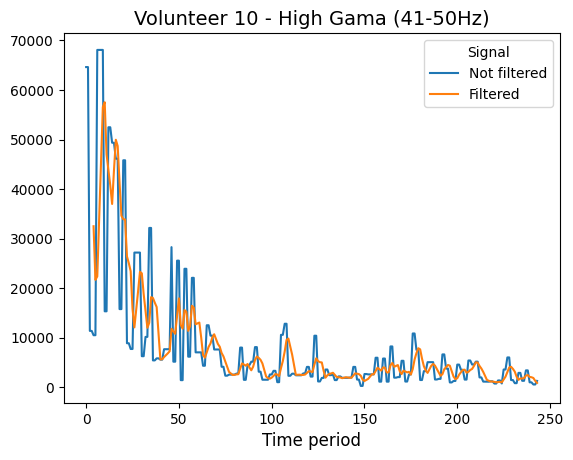

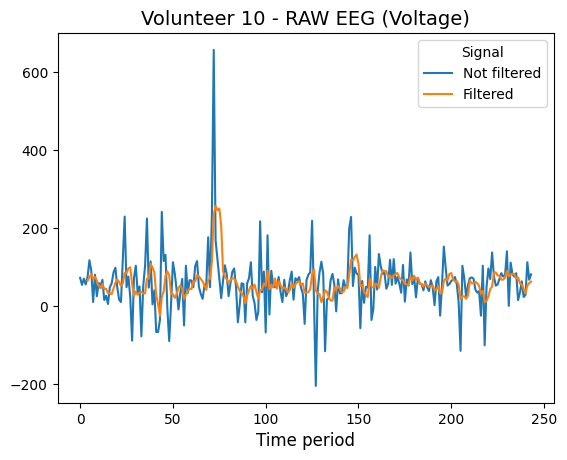

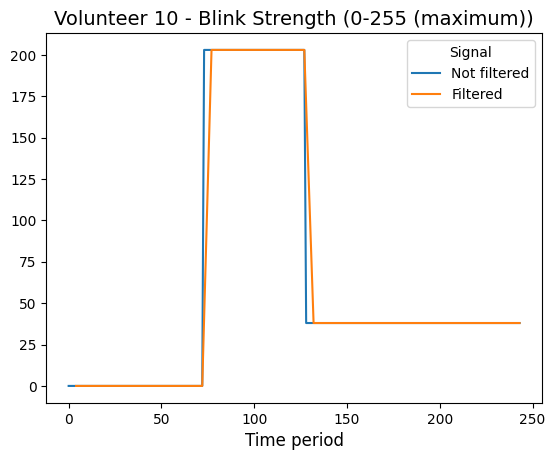

In [183]:
for volunteer in volunteerIndexesList:
    for signal in signalsList:
        signalSeries = volunteersDictionary[volunteer][signal]
        movingAverages = signalSeries.rolling(window_size).mean()

        plt.plot(signalSeries, label='Not filtered')
        plt.plot(movingAverages, label='Filtered')
        plt.legend(title='Signal')
        plt.xlabel('Time period', fontsize=12)
        plt.title(f'{volunteer} - {signal}', fontsize=14)
        plt.show()
